
## **🎮 Video Game Sales Analysis Project**

### 🔎 **Project Description**

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
In this project, we will analyze video game sales data to uncover patterns that help explain what makes a game successful. As data analysts working for the online video game retailer <strong>Ice</strong>, we aim to provide actionable insights that can guide strategic decisions—particularly those related to marketing and advertising efforts.  
<br><br>
We’ll be working with historical data up to the year 2016, and our task is to simulate the role of analysts planning campaigns for 2017. While the year is fictional, our goal is to gain practical experience in exploratory data analysis and data-driven forecasting.  
<br><br>
Ultimately, the focus is on strengthening our ability to extract insights from real-world data and apply them to meaningful business questions.
</div>


### **🧰 Environment Setup and Required Libraries**

In [81]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### **📥 Step 1: Loading and Initial Data Exploration**

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ First, we load the dataset and perform a basic inspection to understand its structure, dimensions, and types of variables before diving into deeper analysis.
</div>

In [82]:
# Load the dataset
df = pd.read_csv('./datasets/games.csv')

In [83]:
# Display basic information about the dataset and explore missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [84]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [85]:
# Explore ESBR ratings 
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [86]:
# Explore 'tbd' cases
(df == 'tbd').sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score          0
User_Score         2424
Rating                0
dtype: int64

In [87]:
# Explore duplicates
print(df.duplicated().sum())  
print(df.duplicated(subset=['Name', 'Platform']).sum())  
df[df.duplicated(subset=['Name', 'Platform'], keep=False)].sort_values(by=['Name', 'Platform'])

0
5


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


### 🔎 **Initial Data Overview Summary**

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

📊 <strong>Total Records:</strong>  
- The dataset contains <strong>16,715 entries</strong>.

⚠️ <strong>Identified Data Issues:</strong>  
- Significant <strong>missing values</strong> in `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, and `Rating`.  
- `Year_of_Release` is a float but semantically represents discrete years — it should be converted to `int`.  
- `User_Score` is stored as text and includes values such as `'tbd'`, preventing direct numeric conversion.  
- The `Rating` column mixes current and outdated ESRB categories. Normalization is needed:  
  - Legacy labels like `'K-A'` should be replaced with `'E'`.  
  - `'RP'` (Rating Pending) can be treated as missing.

♻️ <strong>Duplicate Records:</strong>  
- No fully duplicated rows were found across all columns (`df.duplicated().sum() = 0`).  
- However, <strong>5 duplicated pairs</strong> based on `Name` and `Platform` exist.  
  - Examples include *Madden NFL 13* (PS3) and *Sonic the Hedgehog* (PS3), where entries differ only in minor details like sales or release year.  
  - These are not exact duplicates, but may be redundant or inconsistent.

📌 <strong>Suggested Next Steps:</strong>  
- Investigate duplicated entries with minimal differences to determine if consolidation is needed.  
- Drop or merge entries with clearly incomplete or conflicting values (e.g., all-zero sales, missing year).

</div>



### **🧹 Step 2: Data Preparation**

#### **🧾 2.1 Standardizing Column Names**


<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ We standardize column names by converting them to lowercase. This improves readability and consistency when writing code.
</div>

In [88]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

In [89]:
# Verify the changes
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### **🔄 2.2 Data Type Conversion**

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ We convert columns like <code>Year_of_Release</code> and <code>User_Score</code> to appropriate data types. This ensures numerical consistency and allows proper analysis and visualization.
</div>

In [90]:
# Change year_of_release from float to integrer
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [91]:
# Change user_score from object to float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')


In [92]:
search_value = "tbd"
mask = df.isin([search_value]).any(axis=1)
results = df[mask]
print(results)

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []



### 🔎 **Data Type Conversion Overview**

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

Two key type conversions were applied to prepare the dataset for numerical analysis:

- <code>year_of_release</code> was converted from <code>float64</code> to nullable integer <code>Int64</code> to better represent its categorical and discrete nature.
- <code>user_score</code> was transformed from <code>object</code> to <code>float64</code> to allow for numerical computations and analysis.

As part of the <code>user_score</code> cleanup, all <strong>'tbd'</strong> entries — representing missing or pending user reviews — were treated as <code>NaN</code> using a coercion strategy.  
This ensured that only valid numerical ratings were retained for modeling and exploration.

</div>

#### **🕳️ 2.3 Handling Missing Values**

In [93]:
# Examine missing values
for col in df.columns:
    missing_count = df[col].isna().sum()
    missing_pct = df[col].isna().mean() * 100
    print(f"Missing values in '{col}': {missing_count} ({missing_pct:.2f}%)")

Missing values in 'name': 2 (0.01%)
Missing values in 'platform': 0 (0.00%)
Missing values in 'year_of_release': 269 (1.61%)
Missing values in 'genre': 2 (0.01%)
Missing values in 'na_sales': 0 (0.00%)
Missing values in 'eu_sales': 0 (0.00%)
Missing values in 'jp_sales': 0 (0.00%)
Missing values in 'other_sales': 0 (0.00%)
Missing values in 'critic_score': 8578 (51.32%)
Missing values in 'user_score': 9125 (54.59%)
Missing values in 'rating': 6766 (40.48%)


<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ We examine missing values across all columns to assess the extent of data quality issues. While most fields are nearly complete, we observe high missingness in <code>critic_score</code> (51.3%), <code>user_score</code> (54.6%), and <code>rating</code> (40.5%). These variables will require special attention, as their absence could affect later modeling and interpretation.
</div>

/var/folders/j5/jf9mdkn50wlb2cn9cywgwwym0000gn/T/ipykernel_34546/3483212947.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_platform = df.groupby('platform').apply(lambda group: group.isnull().sum())


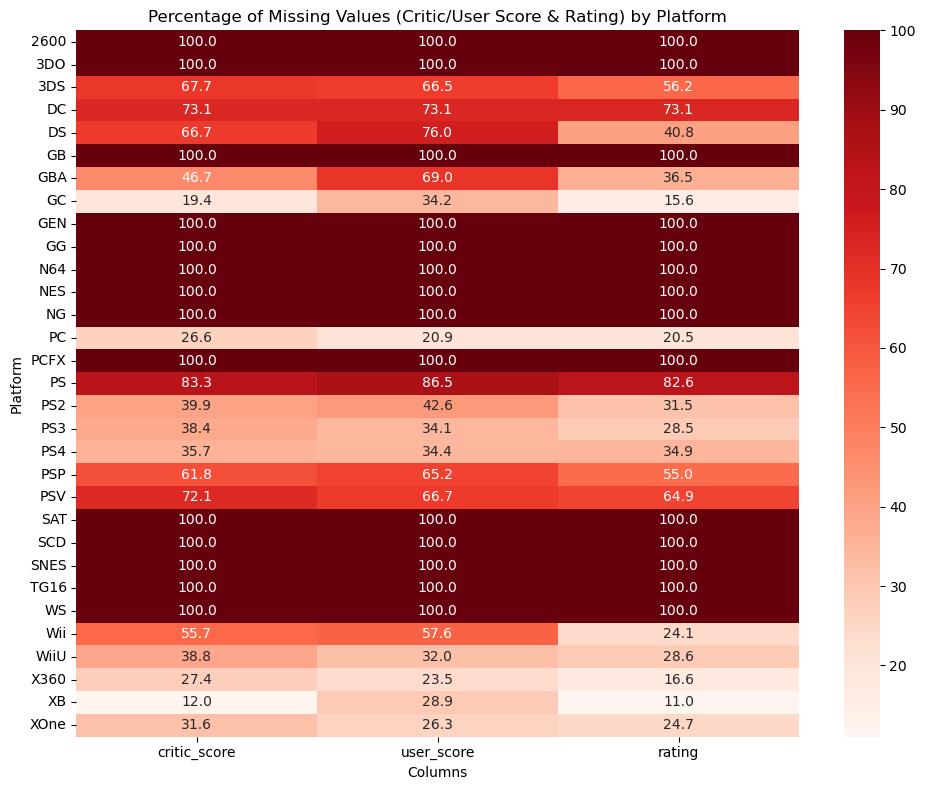

In [94]:

# Calculate total entries per platform
platform_counts = df['platform'].value_counts()

# Calculate missing values per column and platform
missing_by_platform = df.groupby('platform').apply(lambda group: group.isnull().sum())

# Normalize (percentage of missing values per column within each platform)
missing_pct_by_platform = missing_by_platform.div(platform_counts, axis=0) * 100

# Select only the columns of interest
columns_of_interest = ['critic_score', 'user_score', 'rating']
missing_pct_subset = missing_pct_by_platform[columns_of_interest]

# Visualize with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(missing_pct_subset, annot=True, fmt=".1f", cmap="Reds")
plt.title("Percentage of Missing Values (Critic/User Score & Rating) by Platform")
plt.xlabel("Columns")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

➡️ Notably affected platforms include:

- 🎮 **Retro platforms** (`2600`, `NES`, `SNES`, `SCD`) show **100% missing values** in `critic_score`, `user_score`, and `rating`, likely due to unrecorded data for older games.

- 🧮 **Modern platforms** (`PS4`, `PS3`, `PSV`, `DS`) have **moderate missingness (30–70%)** in subjective rating fields — potentially due to incomplete aggregation in newer data pipelines.
</div>

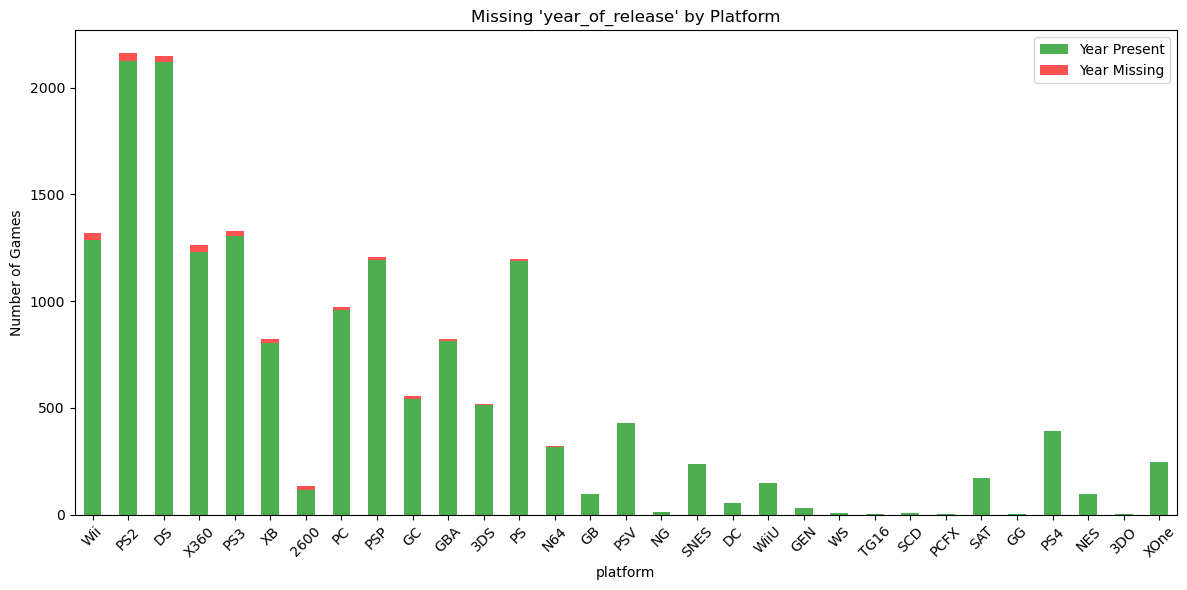

In [95]:
# Analyze patterns in 'year_of_release'

# Create a boolean column to flag missing years
df['missing_year'] = df['year_of_release'].isna()

# Group by platform and count how many entries are missing vs. not missing
missing_by_platform = df.groupby(['platform', 'missing_year']).size().unstack(fill_value=0)

# Plot stacked bar chart
missing_by_platform.sort_values(True, ascending=False).plot(kind='bar', stacked=True, figsize=(12,6), color=['#4CAF50', '#FF5252'])
plt.title("Missing 'year_of_release' by Platform")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.legend(["Year Present", "Year Missing"])
plt.tight_layout()
plt.show()




<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ 🧾 <strong>Missing Values in <code>year_of_release</code> Over Time</strong>  
From the chart, we can see the red portion (missing years) is very small across all platforms. There is no strong concentration of missing values in one or two platforms, which might have suggested a systemic issue or required imputation.
</div>

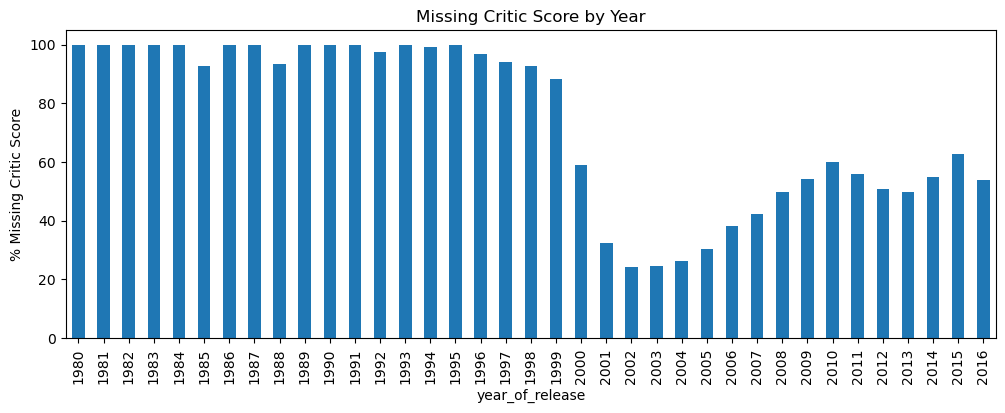

In [96]:
# Analyze patterns in missing values in 'critic score'
df.groupby('year_of_release')['critic_score'].apply(lambda x: x.isna().mean() * 100).plot(kind='bar', figsize=(12,4))
plt.ylabel('% Missing Critic Score')
plt.title('Missing Critic Score by Year')
plt.show()



<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ 🧾 <strong>Missing Values in <code>critic_score</code> Over Time</strong>  
The percentage of missing values in <code>critic_score</code> is extremely high before the year 2000 (often over 90%). It improves significantly between 2003 and 2007 — where data is most complete — but starts increasing again, reaching 40–60% in more recent years.  
<br><br>
This trend might indicate that critic reviews were either not collected or not digitized in the earlier years, and possibly deprioritized again in recent times. A likely explanation is the transformation of the press landscape: the collapse in print media circulation following the rise of online platforms forced professional critics to focus mostly on blockbuster titles.  
<br><br>
Additionally, the explosion in the number of games released with the rise of digital marketplaces (like Steam) made it practically impossible for every title to receive critical coverage — especially before centralized aggregators like Metacritic or console stores became standard.  
<br><br>
</div>

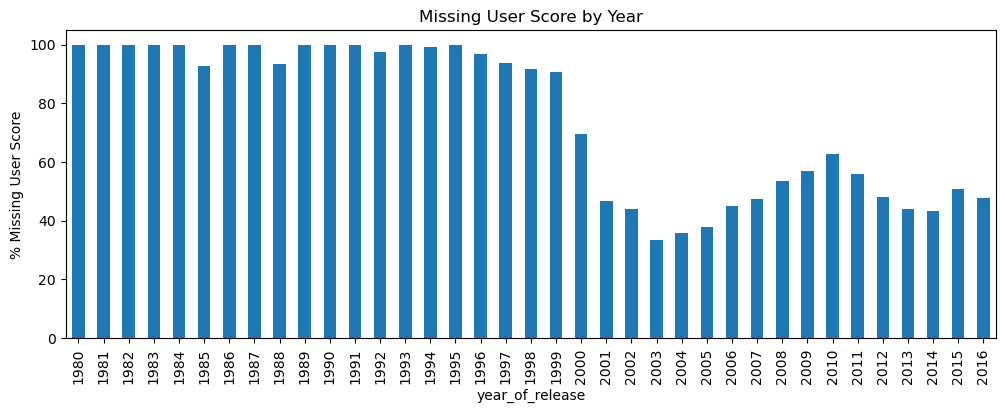

In [97]:
# Analyze patterns in missing values in 'user_score'

df.groupby('year_of_release')['user_score'].apply(lambda x: x.isna().mean() * 100).plot(kind='bar', figsize=(12,4))
plt.ylabel('% Missing User Score')
plt.title('Missing User Score by Year')
plt.show()


<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ 🙋 <strong>Missing Values in <code>user_score</code> Over Time</strong>  
The missing data pattern for <code>user_score</code> closely mirrors that of <code>critic_score</code>. It is nearly absent before 2000, becomes relatively complete between 2003 and 2007, and then becomes increasingly sparse again in later years.  
<br><br>
This likely reflects the evolution of user-review platforms and participation.
</div>

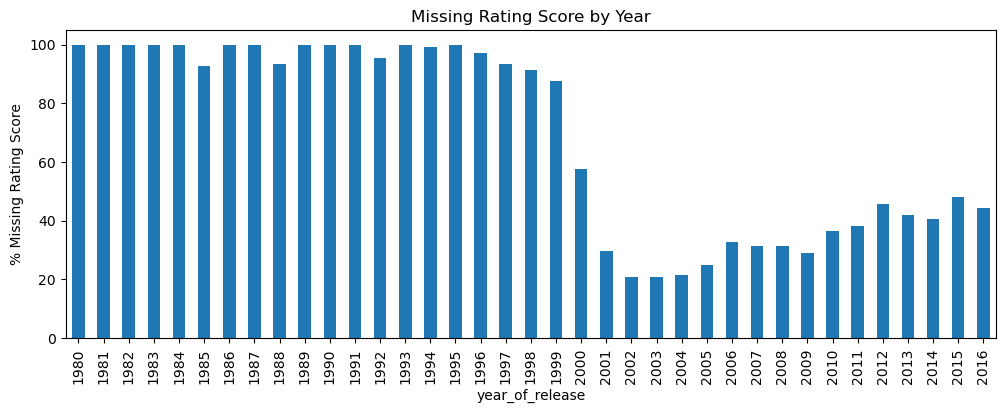

In [98]:

# Analyze patterns in missing values in 'rating'
df.groupby('year_of_release')['rating'].apply(lambda x: x.isna().mean() * 100).plot(kind='bar', figsize=(12,4))
plt.ylabel('% Missing Rating Score')
plt.title('Missing Rating Score by Year')
plt.show()



<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️  <strong>Missing Values in <code>rating</code> Over Time</strong>  
The <code>rating</code> column follows a similar pattern: missing values are very high prior to 2000, decrease during the mid-2000s, and rise again in the 2010s.
</div>

In [99]:
df.drop('missing_year', axis=1, inplace=True)

### 🔎 **Handling Missing Values in the Dataset**

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

🧼 After analyzing the missing data patterns, we applied different strategies depending on the context and importance of each column.

<br>

✅ <strong>Dropped Rows with Minimal Missingness</strong>  
The following columns had very few missing values, and the affected rows were dropped:

- <strong>name</strong> (0.01%): The name of the game is essential for identification; without it, the row is not usable.  
- <strong>genre</strong> (0.01%): Genre is important for grouping and classification; imputing it would require guessing.  
- <strong>year_of_release</strong> (1.61%): Time-based analysis is key in this project, so dropping is safer than imputing.  

This removal affected only 273 rows (~1.6%), which does not significantly impact the dataset’s overall integrity.

<br>

🔍 <strong>Preserved Missing Values for Non-Random Patterns</strong>  
For the following columns, missingness was retained (<code>NaN</code>) and not imputed:

- <strong>critic_score</strong> (51.32%): Left as NaN due to strong non-random temporal pattern. Imputation would bias results.  
- <strong>user_score</strong> (54.60%): Same as above — missing values are clustered by year. Already cleaned by converting 'tbd' to NaN.  
- <strong>rating</strong> (40.48%): Also follows a temporal pattern. Left as NaN, to be handled properly later.

<br>

📆 <strong>Likely Causes of Missing Data</strong>  
The temporal distribution of missing values appears to stem from the lack of standardized review and rating systems in the early decades of gaming. Platforms like Metacritic (for scores) emerged around 1999, and ESRB ratings became common only after 1994. Many earlier games either did not receive formal reviews or were not documented in the sources used to build this dataset.

<br>

By dropping values only when necessary and preserving <code>NaN</code>s where imputation could introduce bias, we maintain a dataset that is both clean and reliable for downstream analysis.

</div>

In [100]:
# Drop rows with missing data
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

#### **🧾 2.4 Normalize Categories**

In [101]:
# Normalize the 'rating' column
df['rating'] = df['rating'].replace({
    'K-A': 'E',     
    'RP': np.nan    
})

In [102]:
print(df['rating'].value_counts(dropna=False))

rating
NaN     6677
E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
Name: count, dtype: int64


### 🔎 **Normalization of the <code>rating</code> Column**

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

🧼 The <code>rating</code> column contained a mix of current ESRB categories, legacy labels, and placeholder values. To ensure consistency, we applied the following normalization strategy:

- Replaced the outdated label <strong>'K-A'</strong> (Kids to Adults) with its modern equivalent: <strong>'E'</strong> (Everyone).  
- Treated the placeholder value <strong>'RP'</strong> (Rating Pending) as missing data and converted it to <code>NaN</code>.  
- Preserved valid ESRB categories such as <code>'E'</code>, <code>'E10+'</code>, <code>'T'</code>, <code>'M'</code>, <code>'AO'</code>, and <code>'EC'</code>.

<br>

This cleanup ensures the <code>rating</code> column is ready for reliable grouping, filtering, and predictive modeling.

</div>

#### **🔁 2.5 Handling Duplicates**

In [103]:
print(df.duplicated().sum())  
print(df.duplicated(subset=['name', 'platform']).sum())  
df[df.duplicated(subset=['name', 'platform'], keep=False)].sort_values(by=['name', 'platform'])

0
3


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


In [104]:
combined = df.iloc[[604, 16230]].copy()
new_row = {
    'name': combined['name'].iloc[0],
    'platform': combined['platform'].iloc[0],
    'year_of_release': combined['year_of_release'].iloc[0],
    'genre': combined['genre'].iloc[0],
    'na_sales': combined['na_sales'].sum(),
    'eu_sales': combined['eu_sales'].sum(),
    'jp_sales': combined['jp_sales'].sum(),
    'other_sales': combined['other_sales'].sum(),
    'critic_score': combined['critic_score'].mean(),
    'user_score': combined['user_score'].mean(),
    'rating': combined['rating'].iloc[0]
}
df = df.drop([604, 16230])
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


### 🔎 **Handling Duplicate Game Entries**

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

♻️ After reviewing duplicate entries by <code>Name</code> and <code>Platform</code>, we found that only one case — <em>Madden NFL 13</em> on PS3 (2012) — represented a true duplicate. The two entries were nearly identical, differing only slightly in sales values. We merged them by summing regional sales and averaging review scores.

<br>

The other two duplicate pairs had different <code>year_of_release</code> values, suggesting they were distinct editions or re-releases of the same game. Since they refer to different versions of the same title, we retained both entries without combining them.

</div>

#### **💰 2.6 Calculate Total Sales**


In [105]:
# Calculate total sales across all regions and put them in a different column
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38



## **📊 Step 3: Analyzing Video Game Sales Data**

### **📆 3.1 Temporal Analysis of Game Releases**

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ Let's examine the distribution of game releases across different years to better understand the dataset's temporal coverage and identify key periods of industry activity.
</div>

In [106]:

# Create a DataFrame with game releases by year
game_releases_by_year = df.groupby('year_of_release').size().reset_index(name='count')

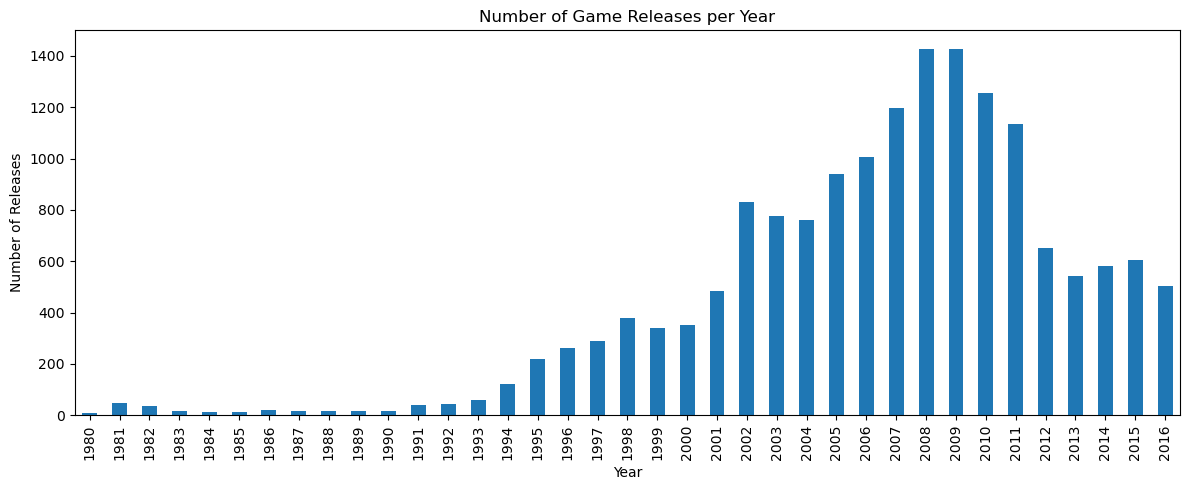

In [107]:
# Visualize the distribution of games across years
game_releases_by_year.plot(
    x='year_of_release',
    y='count',
    kind='bar',
    figsize=(12, 5),
    legend=False
)
plt.title('Number of Game Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.tight_layout()
plt.show()

In [108]:
# Display summary statistics for each year
df.groupby('year_of_release')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
year_of_release,,,,,,,,
1980,9.0,1.264444,1.383547,0.23,0.3400,0.770,1.1500,4.31
1981,46.0,0.775652,0.783019,0.13,0.3125,0.465,0.9525,4.50
1982,36.0,0.802222,1.257910,0.14,0.3350,0.540,0.7800,7.81
1983,17.0,0.988235,0.838825,0.16,0.4000,0.770,1.1300,3.20
1984,14.0,3.596429,7.200795,0.27,1.1300,1.485,2.0900,28.31
1985,14.0,3.853571,10.510376,0.02,0.4650,1.015,1.4550,40.24
1986,21.0,1.765714,1.328001,0.30,1.1500,1.360,2.2000,6.50
1987,16.0,1.356250,1.225174,0.07,0.4550,0.885,2.2125,4.38
1988,15.0,3.147333,4.414414,0.03,0.9700,1.510,3.1450,17.28


### 🔎 **Conclusion: Trends in Total Sales and Forecasting Considerations**

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

📈 The data reveals a clear growth trend in game releases and sales peaking between <strong>2006–2011</strong>, followed by a steady decline in subsequent years.  
While the earlier periods (2002–2011) show sufficient volume and consistency to support reliable insights, post-2012 data is more volatile and may reflect market shifts or dataset limitations (e.g., incomplete reporting in recent years).

<br>

🎮 The peak of sales during 2006–2011 coincides with the launch of several major consoles:
- 🟦 Xbox 360 (2005)  
- 🟥 PlayStation 3 (2006)  
- 🟩 Nintendo Wii (2006)  
- 🟨 Nintendo 3DS (2011)  

These releases drove a surge in development and sales, as developers leveraged new hardware to reach broader audiences. This trend is visible in the dataset, especially during 2008–2009, which marked the highest number of game releases.

<br>

🧾 <strong>Forecasting Limitations</strong>  
📉 The dataset ends in 2016 and shows declining trends post-2011. Forecasting for 2017 therefore carries a high risk of bias, especially if we assume trends will continue unchanged. Structural changes in the industry, platform cycles, or missing data could distort projections.

<br>

🕹️ Further analysis is needed on <strong>Platform Sales Over Time</strong> to understand how hardware releases relate to sales peaks and help inform strategic planning.

<br>

📌 Although the dataset is outdated, the project reminds us: <em>"The important thing is to get experience working with data."</em>  
For this reason, we will proceed as if it is December 2016, focusing on extracting meaningful insights under that assumption.

</div>


### **🎮 3.2 Platform Sales Analysis Over Time**

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ Now let's analyze how sales vary across platforms and years. This will help us identify which consoles dominated the market during different periods and how platform cycles impact game development and revenue trends.
</div>

In [109]:
# Calculate total sales by platform and year
sales_by_platform_year = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()


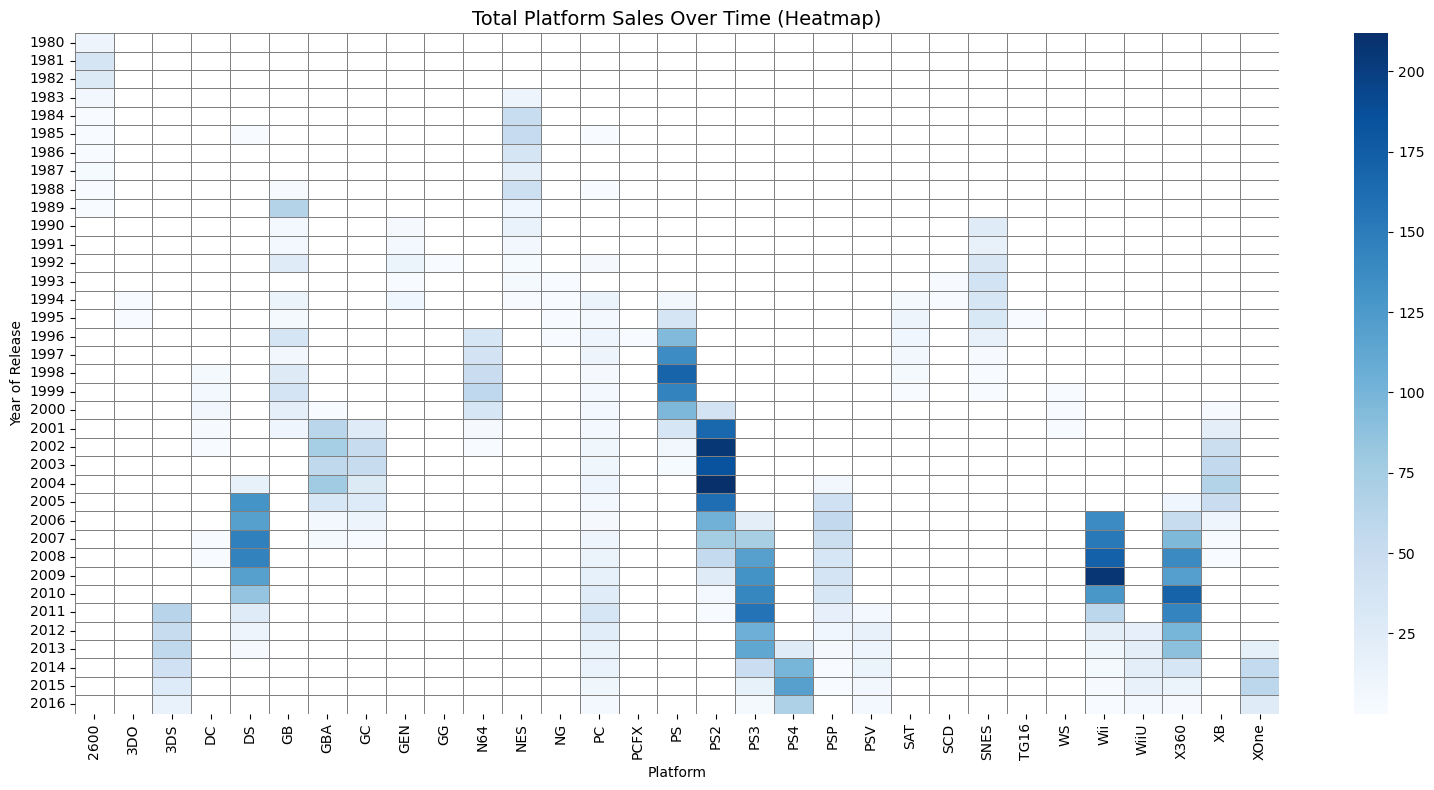

In [110]:

# Create a heatmap of platform sales over time
pivot_table = sales_by_platform_year.pivot(index='year_of_release', columns='platform', values='total_sales')
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table, cmap='Blues', linewidths=0.5, linecolor='gray')

plt.title('Total Platform Sales Over Time (Heatmap)', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Year of Release')
plt.tight_layout()
plt.show()

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ This heatmap visualizes total game sales across platforms and release years. Darker shades represent higher total sales.  
<br><br>
We observe strong sales concentration during 2005–2011 across platforms such as <strong>PS2, PS3, X360, and Wii</strong>. Earlier platforms (e.g., PS, GBA) show smaller peaks in early 2000s, while platforms released post-2012 display fewer entries, suggesting either a shift in market dynamics or data coverage limitations.
</div>

In [111]:
last_year = sales_by_platform_year.groupby('platform')['year_of_release'].max().reset_index()

In [112]:
# Identify platforms with declining sales

declining = []
growing_or_stable = []

active_2016 = sales_by_platform_year[sales_by_platform_year['year_of_release'] == 2016]['platform'].unique()
active_sales = sales_by_platform_year[sales_by_platform_year['platform'].isin(active_2016)]

for platform in active_2016:
    data = active_sales[active_sales['platform'] == platform].sort_values('year_of_release')
    first = data.iloc[0]['total_sales']
    last = data.iloc[-1]['total_sales']
    
    if last < first:
        declining.append(platform)
    else:
        growing_or_stable.append(platform)

print("📉 Declining Platforms:", declining)
print("📈 Growing or Stable Platforms:", growing_or_stable)

📉 Declining Platforms: ['3DS', 'PS3', 'PSV', 'Wii', 'WiiU', 'X360']
📈 Growing or Stable Platforms: ['PC', 'PS4', 'XOne']



<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
    
➡️ 📅 The year <strong>2016</strong> is used as a reference point because it is the **last complete year** in the dataset with reliable and sufficient data across all platforms. Focusing on platforms still active in 2016 ensures that sales trends are assessed fairly — avoiding comparisons with platforms that had already been phased out earlier in the timeline.
<br><br>
📉🆚📈 <strong>Platform Sales Trends — Identifying Decline vs. Stability</strong>  
Platforms such as <strong>3DS, PS3, Wii,</strong> and <strong>X360</strong> are identified as <strong>declining</strong>, based on a drop in sales from their first to last active year. In contrast, <strong>PC, PS4,</strong> and <strong>XOne</strong> maintain stable or increasing sales through 2016, suggesting they remained strong in the market at the time of analysis.
</div>

In [113]:
# Compute start, end, and duration
lifespan = sales_by_platform_year.groupby('platform')['year_of_release'].agg(['min', 'max'])
lifespan['duration'] = lifespan['max'] - lifespan['min'] + 1

# Sort by duration if needed
lifespan = lifespan.sort_values('duration', ascending=False)

# Average duration across platforms
avg_duration = lifespan['duration'].mean()
print(f"Average platform lifespan: {avg_duration:.2f} years")


Average platform lifespan: 8.61 years


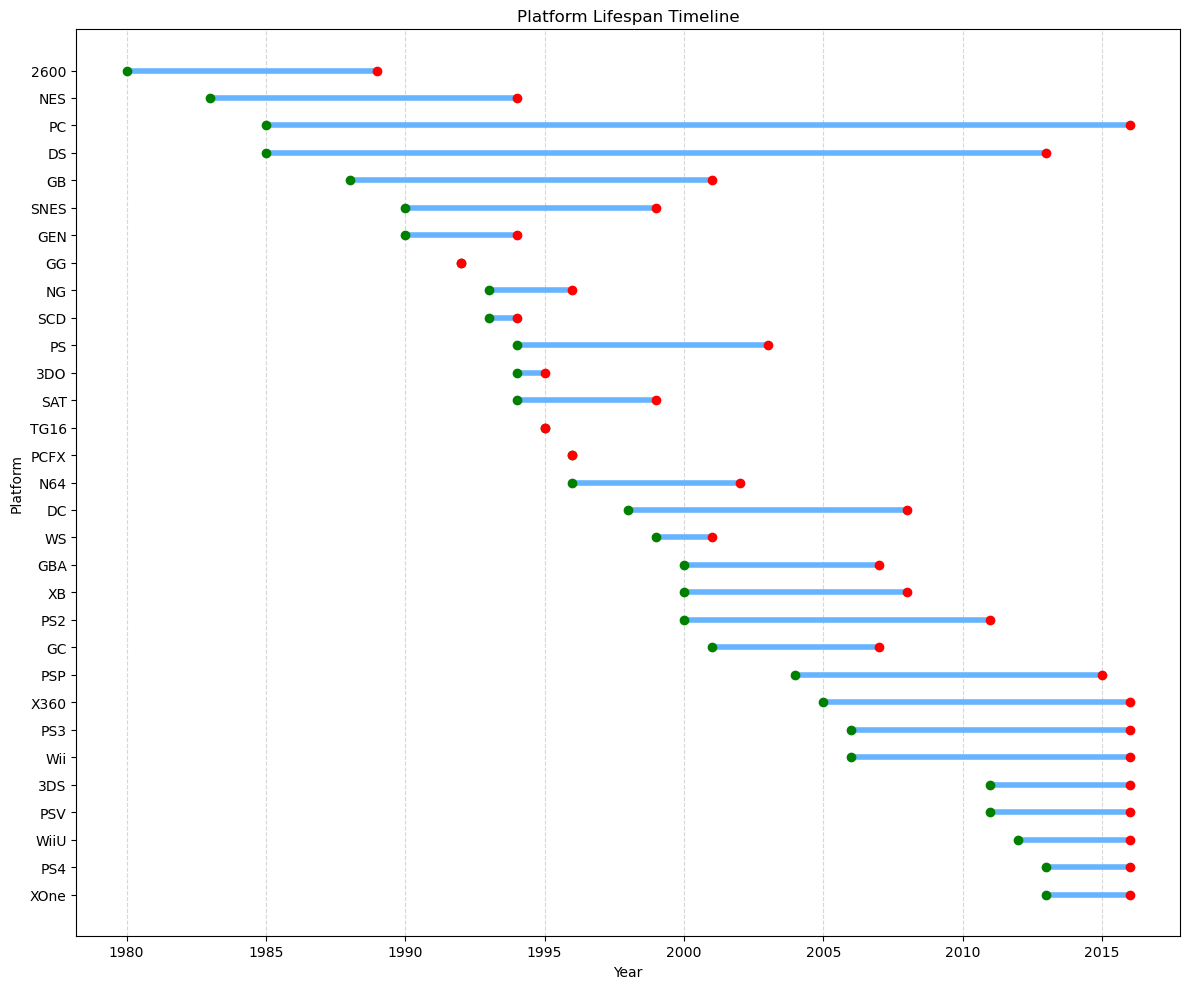

In [114]:
# Optional: reset index to access 'platform' as a column
lifespan = lifespan.reset_index()

# Sort by start year (min)
lifespan_sorted = lifespan.sort_values('min', ascending=False)

# Plot
plt.figure(figsize=(12, 10))

for i, row in lifespan_sorted.iterrows():
    plt.hlines(y=row['platform'], xmin=row['min'], xmax=row['max'], color='#66b3ff', linewidth=4)
    plt.plot(row['min'], row['platform'], 'o', color='green')  # Start year
    plt.plot(row['max'], row['platform'], 'o', color='red')    # End year

plt.title('Platform Lifespan Timeline')
plt.xlabel('Year')
plt.ylabel('Platform')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ 📆 <strong>Platform Lifespan Timeline</strong>
<br><br>    
This chart displays the active lifespan of each gaming platform, from its first year of release to its final year with recorded activity. Each horizontal line represents a platform’s life, starting with a green dot and ending with a red dot.  
<br><br>
Platforms are sorted by their launch year (top = older, bottom = more recent), which helps highlight overlapping generations and market shifts.  
<br><br>
🔍 This visualization allows for easy comparison of longevity — with platforms like <code>2600</code>, <code>PS</code>, and <code>PC</code> showing extended lifespans, while others (e.g., <code>PCFX</code>, <code>3DO</code>, <code>GG</code>) had much shorter market presence.
</div>


### 🔎 **Platform Lifecycles and Sales Trends**

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

➡️ 🎮 <strong>Overview</strong>  
Building on previous analyses (missing data heatmaps, trend classifications, and lifespan distributions), we can identify common lifecycle patterns and performance profiles across gaming platforms.

<br>

🔁 <strong>Typical Platform Lifecycle</strong>  
Most platforms follow a classic lifecycle:
- 🚀 <strong>Launch:</strong> Low initial sales and adoption  
- 📈 <strong>Growth:</strong> Rapid sales increase after 1–2 years  
- 🔝 <strong>Peak:</strong> Highest market activity around years 3–5  
- 📉 <strong>Decline:</strong> Gradual drop as successors emerge

<br>

🧊 <strong>Discontinued Platforms</strong>  
Platforms with no sales after 2015 are considered discontinued. These include:  
<em>PS2, PSP, GBA, GameCube, Dreamcast</em>, among others.

<br>

📉 <strong>Declining Platforms (Still Active in 2016)</strong>  
Identified by a drop in sales from first to last year of activity:
<em>3DS, PS3, PSV, Wii, WiiU, X360</em>

<br>

📈 <strong>Growing or Stable Platforms</strong>  
Platforms that maintained or increased sales through 2016:
<em>PC, PS4, XOne</em>

<br>

📊 <strong>Consistent Performers</strong>  
<em>PC</em> stands out for its long-term resilience, showing no typical rise–fall pattern, likely due to its openness, backward compatibility, and digital marketplace flexibility.

<br>

⏳ <strong>Platform Lifespan</strong>  
The average platform lifespan is approximately <strong>8.6 years</strong>, aligning with traditional console generation cycles. While most platforms operate between <strong>5–12 years</strong>, others like <em>PC</em>, <em>2600</em>, and <em>DS</em> exceed two decades of relevance.

<br>

📆 <strong>Lifespan Timeline Visualization</strong>  
A Gantt-style timeline reveals each platform’s launch and retirement year. Longer lifespans and overlapping generations become visually apparent — especially for platforms like <em>PC</em>, <em>PS</em>, and <em>SNES</em>. Start and end points are highlighted with green and red markers, respectively.

</div>


### **📆 3.3 Determining Relevant Time Period**

Based on our analysis above, let's determine the appropriate time period for predicting 2017 sales.

### 🔎 **Selecting a Time Period for 2017 Sales Forecast**

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

📅 <strong>Selected Period: 2013–2016</strong>  
This 4-year window was chosen because it reflects the most relevant and reliable period for making short-term predictions about 2017 sales.

<br>

✅ <strong>Justification Based on Data</strong>  
Analysis of platform sales over time showed that among platforms still active in 2016, only <em>PC, PS4, and XOne</em> demonstrated stable or growing sales.  
Other platforms like <em>3DS, WiiU, PS3, and X360</em> showed clear declining trends, suggesting they were phasing out and less representative of future behavior.  
By focusing on 2013–2016, we capture the launch and growth phases of PS4 and XOne, as well as the continued strength of PC — the platforms most likely to influence 2017 sales.  
The resulting subset includes <strong>2,233 entries</strong>, a solid and manageable dataset size for this project's scope.

<br>

🧭 <strong>Why This Period Reflects Current Market Conditions</strong>  
- It avoids outdated trends from earlier console generations  
- It includes years when current-generation platforms were active and gaining share  
- Data quality is stronger — fewer missing values and better reporting consistency

<br>

🏁 <strong>Conclusion</strong>  
While not all platforms have completed their life cycles, the 2013–2016 data captures the most relevant market behavior for predicting 2017. This aligns with the project’s goal of simulating a real-world planning scenario at the end of 2016.

</div>

In [115]:

relevant_years = [2013, 2014, 2015,2016] 
df_relevant = df[df['year_of_release'].isin(relevant_years)]
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB



### **📊 3.4 Platform Performance Analysis**

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ Using the selected time window (2013–2016), we now analyze total and average sales performance by platform. This helps us identify the most commercially successful systems during this period and supports platform-focused forecasting for 2017.
</div>

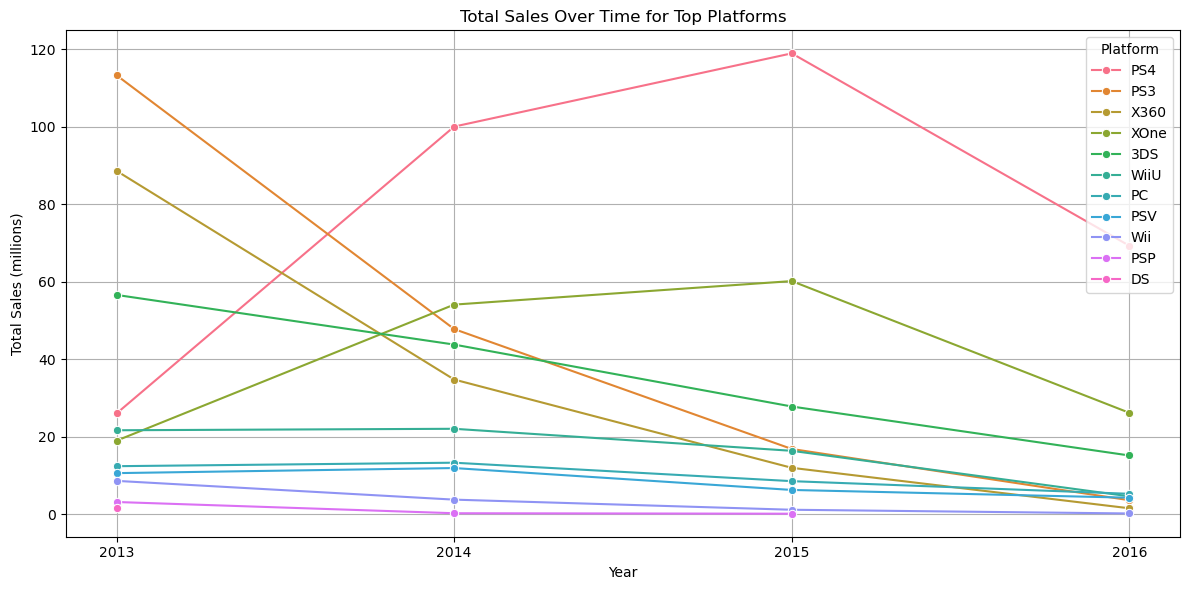

In [156]:
# Analyze platform sales trends
platform_sales_by_year = df_relevant.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
platform_sales_by_year = platform_sales_by_year.sort_values(['total_sales', 'year_of_release'], ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(data=platform_sales_by_year, x='year_of_release', y='total_sales', hue='platform', marker='o')

# Ensure x-axis has only integer ticks
years = platform_sales_by_year['year_of_release'].dropna().unique()
years = sorted(years[~np.isnan(years)].astype(int))
plt.xticks(years)

plt.title('Total Sales Over Time for Top Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platform')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ This chart shows total annual sales by platform from 2013 to 2016. It confirms our classification: <strong>PS3, X360, WiiU, and 3DS</strong> show clear declines, while <strong>PS4, XOne, and PC</strong> maintain stable or growing trends. These patterns validate the selected platforms for 2017 forecasting.
</div>


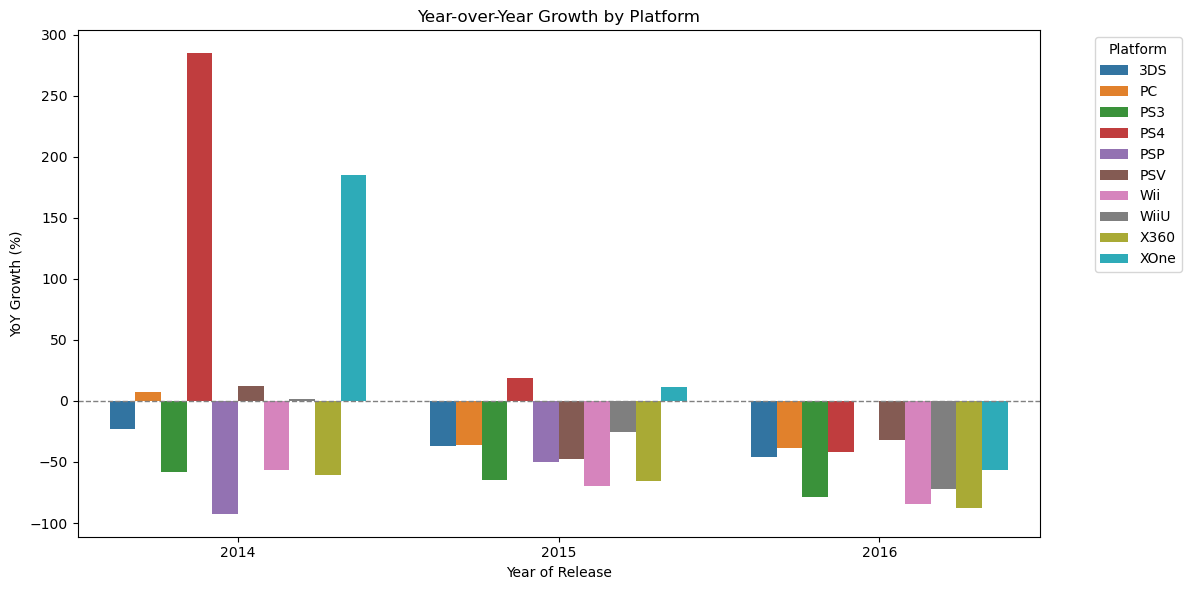

In [117]:

# Visualize top platforms
# Calculate year-over-year growth for each platform


# Sort platforms by total sales
# Group total sales by platform and year
platform_sales = df_relevant.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Sort for correct growth calculation
platform_sales = platform_sales.sort_values(['platform', 'year_of_release'])

# Calculate YoY growth per platform
platform_sales['yoy_growth'] = platform_sales.groupby('platform')['total_sales'].pct_change() * 100

#Filter out NaNs (first year per platform has no growth)
df_yoy = platform_sales.dropna(subset=['yoy_growth'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_yoy, x='year_of_release', y='yoy_growth', hue='platform', dodge=True)

plt.title('Year-over-Year Growth by Platform')
plt.xlabel('Year of Release')
plt.ylabel('YoY Growth (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ 📊 <strong>YoY Growth by Platform (2014–2016)</strong><br>
Bar chart showing yearly sales growth (%) per platform. Highlights include sharp launch growth for <strong>PS4</strong> and <strong>XOne</strong> in 2014, and sustained decline for legacy platforms like <strong>PS3</strong>, <strong>Wii</strong>, and <strong>X360</strong>. A clear, uncluttered view of platform momentum during the late console cycle.
</div>

### 🔎 **Platform Sales Trends and Growth Analysis (2013–2016)**

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

📈 <strong>Growing or Stable Platforms</strong>  
Platforms that showed positive or consistent performance in recent years:

- <strong>PS4:</strong> Strong growth in 2014 and sustained high sales through 2016. Clearly in its growth/maturity phase.  
- <strong>PC:</strong> Maintains steady sales over decades, avoiding the sharp rise/fall cycles typical of consoles.  
- <strong>XOne:</strong> Moderate growth in 2014, followed by noticeable decline by 2016. While still active, its growth is weaker than PS4, suggesting it may be entering maturity or early decline.

<br>

📉 <strong>Declining Platforms</strong>  
<em>3DS, PS3, PSV, Wii, WiiU, X360</em> all show shrinking sales between 2013 and 2016 — both in total and YoY trends — indicating that they are in decline or approaching obsolescence.

<br>

📊 <strong>Supporting Visual Insights</strong>  
- The total sales chart confirms <strong>PS4</strong> as the clear leader, surpassing 300M in global sales.  
- The YoY growth plot highlights PS4’s exceptional expansion in 2014 and contrasts it with XOne’s modest, tapering trajectory.  
- Platforms like <strong>PS3, X360, and Wii</strong> show consistent decline — a pattern typical of systems nearing or past end-of-life.

</div>

### **📦 3.5 Sales Distribution Analysis**

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ Let's examine how game sales are distributed across different platforms. This helps us identify whether a few major titles dominate the market or if sales are spread more evenly, which can influence strategy and forecasting.
</div>

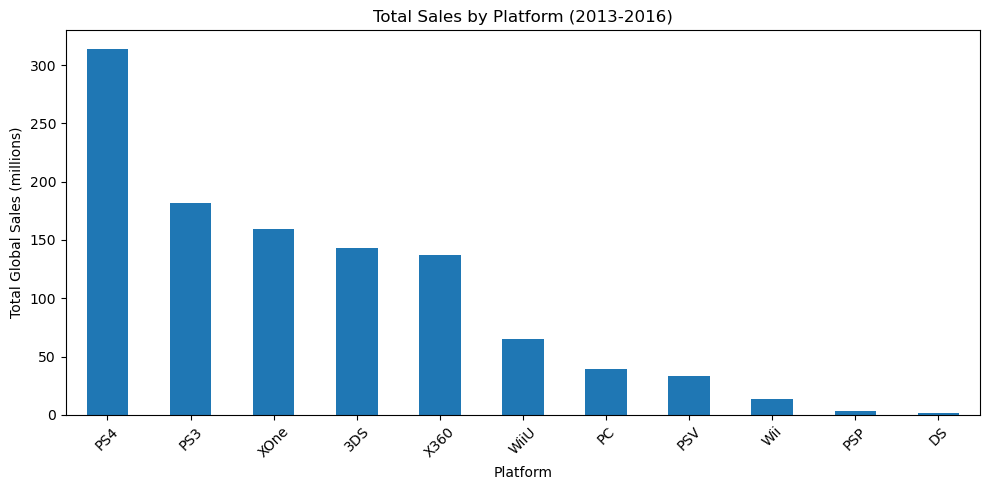

In [118]:
platform_sales = df_relevant.groupby(['platform'])['total_sales'].sum().reset_index('platform')
platform_sales = platform_sales.sort_values(['total_sales'], ascending=False)
platform_sales.plot(x='platform', y='total_sales', kind='bar', legend=False, figsize=(10,5))
plt.title('Total Sales by Platform (2013-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ 📊 <strong>Total Global Sales by Platform (2013–2016)</strong><br>
This bar chart highlights cumulative global game sales per platform during the 2013–2016 period.

<br>

🎯 <strong>PS4</strong> clearly dominates with over 300 million units sold, reflecting its rapid post-launch adoption.  
🎮 Platforms like <strong>PS3</strong>, <strong>XOne</strong>, and <strong>3DS</strong> also delivered strong performances.  
💡 Despite being in its decline phase, <strong>X360</strong> retained considerable market traction.  
🖥️ <strong>PC</strong> posted modest but steady results, likely driven by a fragmented digital market.  
📉 Platforms such as <strong>Wii</strong>, <strong>PSV</strong>, <strong>PSP</strong>, and <strong>DS</strong> recorded significantly lower totals, suggesting end-of-life or reduced engagement.

</div>


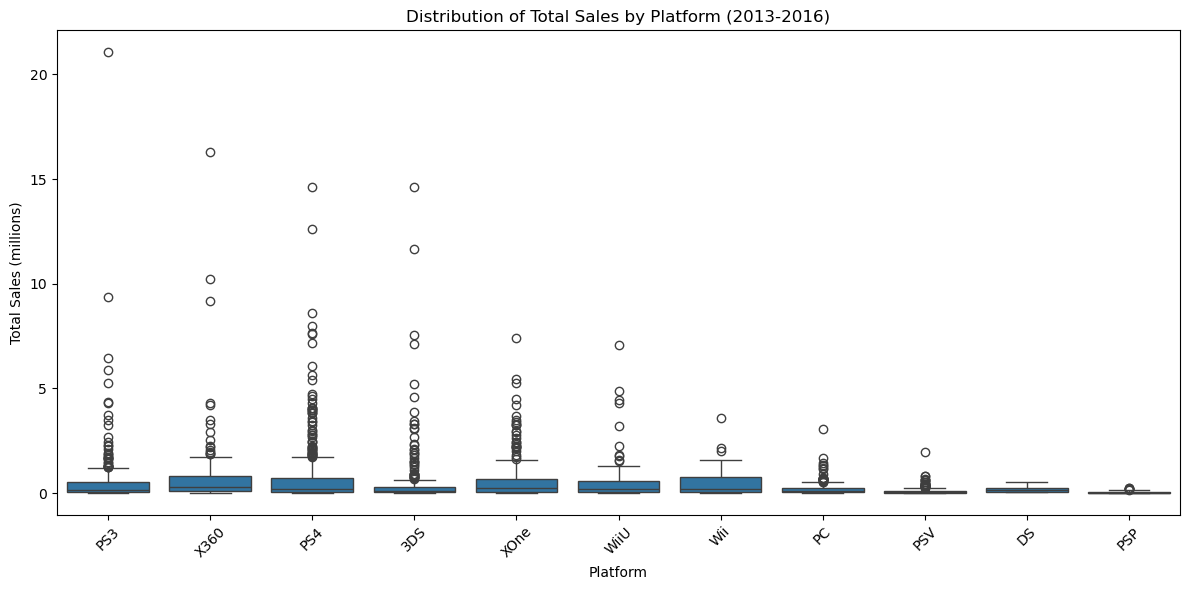

In [119]:
# Create box plot of sales by platform
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_relevant)
plt.title('Distribution of Total Sales by Platform (2013-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ 📦 <strong>Sales Distribution by Platform (2013–2016)</strong><br>
Boxplot showing the distribution of total sales per game across platforms. Most platforms display a similar median performance, but differ in spread and outliers.  
<br><br>
Platforms like <strong>PS3</strong>, <strong>X360</strong>, and <strong>PS4</strong> show a large number of high-performing titles.
</div>

In [120]:
# Calculate detailed statistics for each platform
platform_sales_stats = df_relevant.groupby('platform')['total_sales'].describe().sort_values('mean', ascending=False)
display(platform_sales_stats)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
X360,186.0,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51


<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ 📈 <strong>Descriptive Statistics of Game Sales by Platform</strong>
<br><br>
This table summarizes total sales per game (in millions) across platforms between 2013–2016. 
<br><br>
Platforms like <strong>PS4</strong>, <strong>X360</strong>, and <strong>XOne</strong> show higher mean sales per title, with <strong>PS3</strong> recording the highest maximum (21.05M).  
<br><br>
Meanwhile, platforms such as <strong>PSP</strong> and <strong>PSV</strong> show consistently low averages and low dispersion, indicating smaller and more homogeneous market impact.  
<br><br>
The presence of extreme outliers (max >> 75%) in most platforms reinforces the need to account for skewness when modeling or interpreting total sales.
</div>



### 🔎 **Summary of Platform Sales Statistics (2013–2016)**

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

📊 This section provides a statistical overview of platform-level performance based on total global game sales from 2013 to 2016.

<br>

🎯 Platforms like <strong>PS4</strong>, <strong>X360</strong>, and <strong>XOne</strong> show the highest average sales per title, with <strong>PS3</strong> achieving the single highest maximum (21.05M).  
📉 In contrast, platforms like <strong>PSV</strong> and <strong>PSP</strong> recorded consistently low means and narrow interquartile ranges, indicating a smaller and more uniform market impact.  
⚠️ Many platforms are highly skewed, with outliers driving up the maximums relative to the median — especially visible in <strong>PS3</strong>, <strong>PS4</strong>, and <strong>3DS</strong>.

<br>

➡️ Overall, these results confirm that the console market during this period was led by newer-generation platforms like <strong>PS4</strong> and <strong>XOne</strong>, both in volume and distribution of sales per title. Older consoles such as <strong>X360</strong> and <strong>PS3</strong> remained relevant through late-stage momentum, while handheld and legacy platforms (e.g. <strong>Wii</strong>, <strong>DS</strong>, <strong>PSP</strong>) showed signs of market exit, with much lower average performance and fewer top-selling titles.

</div>


### **⭐ 3.6 Review Score Impact Analysis**

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ Select a popular platform and analyze the relationship between review scores and game sales. This will help assess whether critic or user evaluations influence commercial success.
</div>

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ Based on the previous analysis (2013–2016), <strong>PlayStation 4 (PS4)</strong> is selected for review impact analysis.

<br>

- <strong>High Average and Maximum Sales:</strong> PS4 stands out for its strong commercial performance, making it ideal for identifying success factors.  
- <strong>Significant Number of Releases:</strong> A large volume of titles ensures a rich dataset for evaluating correlations with critic and user scores.  
- <strong>Growing or Stable Trend:</strong> PS4 maintained strong momentum during this period, reinforcing its relevance for short-term forecasting.

<br>

Focusing on PS4 enables us to explore how game quality indicators (like reviews) relate to sales in a leading current-generation platform.
</div>

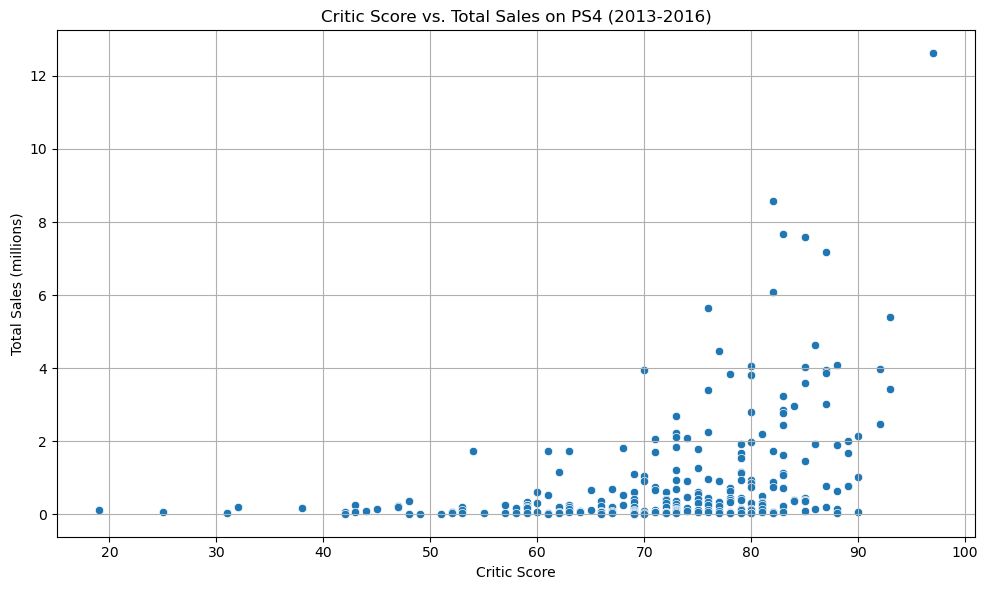

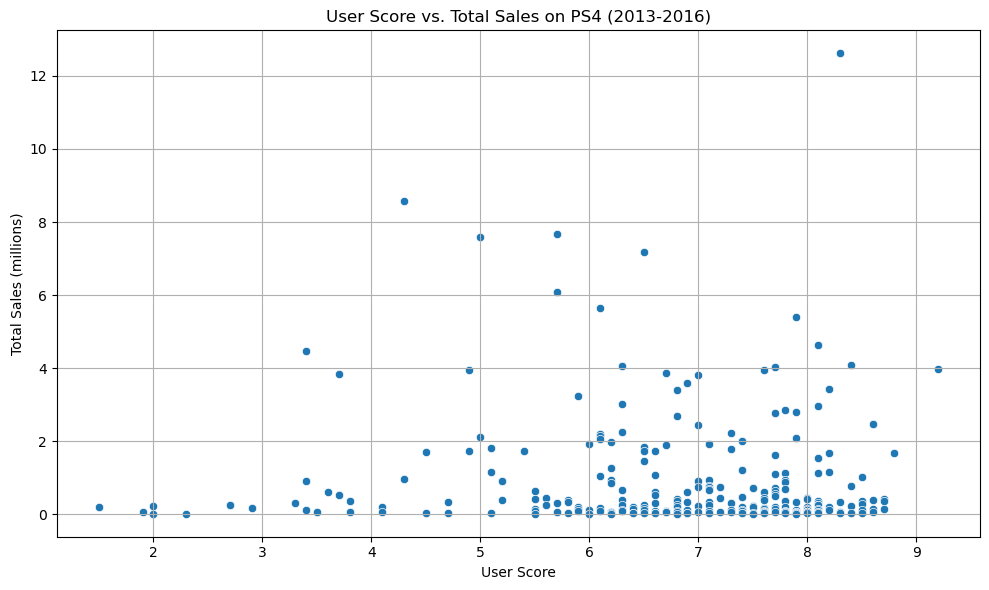

In [121]:
# Create scatter plots for both critic and user scores
# Filter data for PS4 platform in the relevant period
ps4_data = df_relevant[df_relevant['platform'] == 'PS4'].copy()

# Drop rows with missing critic_score or user_score for the scatter plots
ps4_data_scores = ps4_data.dropna(subset=['critic_score', 'user_score']).copy()

# Create scatter plot for Critic Scores vs. Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data_scores)
plt.title('Critic Score vs. Total Sales on PS4 (2013-2016)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create scatter plot for User Scores vs. Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data_scores)
plt.title('User Score vs. Total Sales on PS4 (2013-2016)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ These scatter plots explore the relationship between review scores and total sales for PS4 games during 2013–2016.

<br>

<strong>🎯 Critic Score vs. Total Sales:</strong>  
The plot shows a moderate positive trend. Games with higher critic scores tend to have higher sales, although there is variability. Some outliers with mid-range scores achieved strong sales, while a few highly rated games saw limited commercial success.

<br>

<strong>👥 User Score vs. Total Sales:</strong>  
This plot displays a weak or nonexistent linear relationship. The points are widely scattered, suggesting user ratings do not significantly predict sales performance for PS4 games in this period.

</div>

In [122]:
# Calculate correlations
correlation_matrix = ps4_data_scores[['critic_score', 'user_score', 'total_sales']].corr()
display(correlation_matrix)

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ <strong>Correlation Matrix: Review Scores and Sales</strong>  
This matrix quantifies the linear relationships between review scores and total sales for PS4 games.

<br>

- <strong><code>critic_score</code> vs. <code>total_sales</code>:</strong> Correlation ≈ <strong>0.41</strong>. A moderate positive relationship, confirming that higher critic reviews are associated with higher sales.  
- <strong><code>user_score</code> vs. <code>total_sales</code>:</strong> Correlation ≈ <strong>–0.03</strong>. No meaningful linear correlation — user ratings do not predict sales.  
- <strong><code>critic_score</code> vs. <code>user_score</code>:</strong> Correlation ≈ <strong>0.56</strong>. A moderate positive correlation, indicating general agreement between critics and users.

</div>

### 🔎 **Interpreting Review Scores and Sales on PS4 (2013–2016)**

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

The scatter plots and correlation matrix provide insight into how reviews relate to game sales on the PS4 during the 2013–2016 period.

<br>

- <strong>Critic scores</strong> show a moderate positive linear relationship with total sales. While not definitive, higher critic ratings tend to align with higher commercial performance.  
- <strong>User scores</strong>, on the other hand, show little to no correlation with total sales, indicating they are not a strong predictor of market success in this dataset.

<br>

Overall, critic reviews appear to have more influence on sales performance than user ratings, at least for PS4 titles during this time frame.

</div>


### **🔀 3.7 Cross-Platform Comparison**

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ This section compares the sales performance of games released on multiple platforms. By analyzing cross-platform titles, we can identify how platform choice impacts commercial outcomes and whether some systems tend to perform better for shared releases.
</div>

In [123]:

# Find games released on multiple platforms

multi_platform_games = df_relevant.groupby('name')['platform'].nunique().reset_index(name='platform_count')
multi_platform_games = multi_platform_games[multi_platform_games['platform_count'] > 1]

# Display the entries for these games from the relevant DataFrame
multi_platform_df = df_relevant[df_relevant['name'].isin(multi_platform_games['name'])].sort_values(by='name')
multi_platform_df['name'].nunique()


473

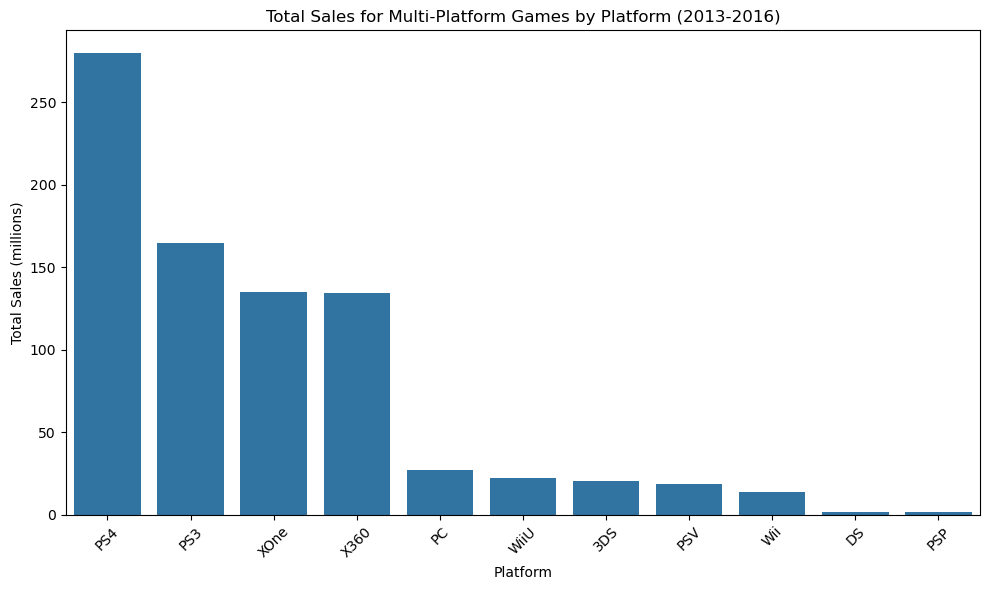

In [124]:

# Compare sales across platforms for these games

multi_platform_sales_by_platform = multi_platform_df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='total_sales', data=multi_platform_sales_by_platform)
plt.title('Total Sales for Multi-Platform Games by Platform (2013-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🔎 **Cross-Platform Sales Performance Summary (2013–2016)**

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

The comparison of total sales from multi-platform games reveals clear dominance by <strong>PS4</strong>, followed by <strong>PS3</strong> and <strong>XOne</strong>. These platforms captured the bulk of revenue for games released across multiple systems.

<br>

- <strong>PS4</strong> led the market for shared releases, confirming its commercial strength.  
- <strong>Older consoles</strong> like <em>X360</em> and <em>PS3</em> still contributed meaningfully, but at reduced levels.  
- <strong>PC, WiiU, 3DS, and PSV</strong> showed weaker performance in the multi-platform space.  
- <strong>DS</strong> and <strong>PSP</strong> had minimal impact, reflecting their phase-out from the mainstream market by this time.

<br>

Overall, the data confirms that <strong>newer generation PlayStation and Xbox consoles</strong> were the key sales drivers for cross-platform releases during 2013–2016.

</div>

### 🕹️ 3.8 Exclusive Game Performance

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ This section focuses on the sales performance of platform-exclusive titles. By isolating games released only on a single system, we can assess how exclusivity influences commercial success and identify which platforms benefit most from dedicated content.
</div>

In [125]:
exclusive_df = df[~df['name'].isin(multi_platform_df['name'])]

In [126]:
exclusive_sales_by_platform = (
    exclusive_df.groupby('platform')['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
)

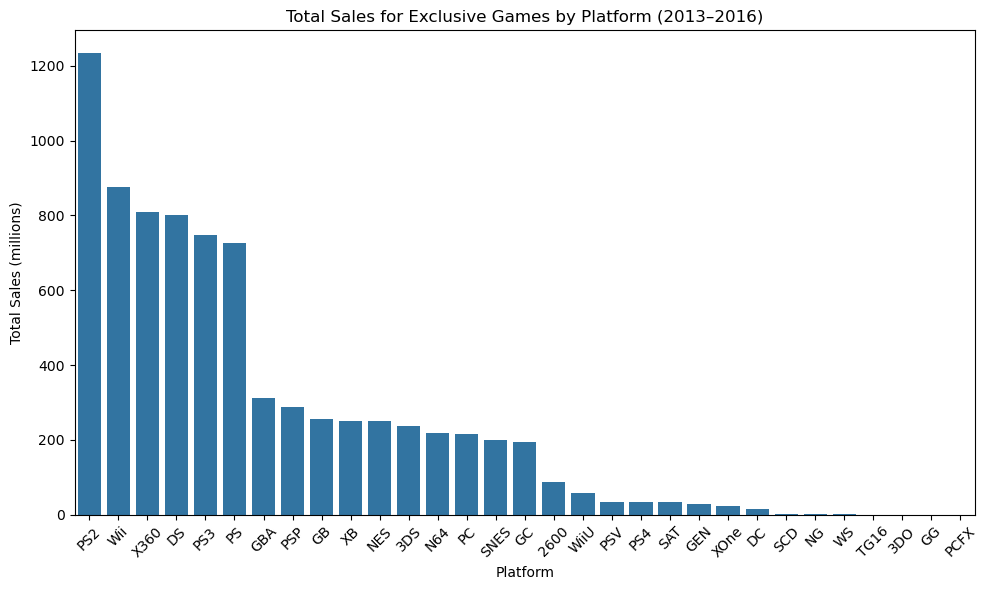

In [127]:
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='total_sales', data=exclusive_sales_by_platform)
plt.title('Total Sales for Exclusive Games by Platform (2013–2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ 🎮 <strong>Total Sales for Exclusive Games by Platform (2013–2016)</strong><br>
This bar chart shows cumulative sales of platform-exclusive titles during the period.  

<br>

🎯 <strong>PS2</strong> leads by a wide margin, surpassing 1200 million units, followed by strong performers like <strong>Wii</strong>, <strong>X360</strong>, and <strong>DS</strong>.  
🕹️ Legacy platforms such as <strong>PS3</strong>, <strong>GBA</strong>, and <strong>PSP</strong> also delivered substantial exclusive content during this window.  
📉 Newer-generation systems like <strong>PS4</strong> and <strong>XOne</strong> appear at the lower end — likely due to the growing trend toward multiplatform releases during this period.  
📌 These results highlight how exclusives have historically contributed to total sales, especially for earlier console generations.
</div>


### **🎭 3.9 Genre Analysis**

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ Finally, let's examine the distribution of games by genre. This analysis will help identify which game categories were most common and commercially successful during the 2013–2016 period.
</div>

In [128]:
# Analyze genre performance
print(df_relevant['genre'].unique())

['Action' 'Shooter' 'Role-Playing' 'Misc' 'Sports' 'Fighting' 'Racing'
 'Simulation' 'Platform' 'Strategy' 'Adventure' 'Puzzle']


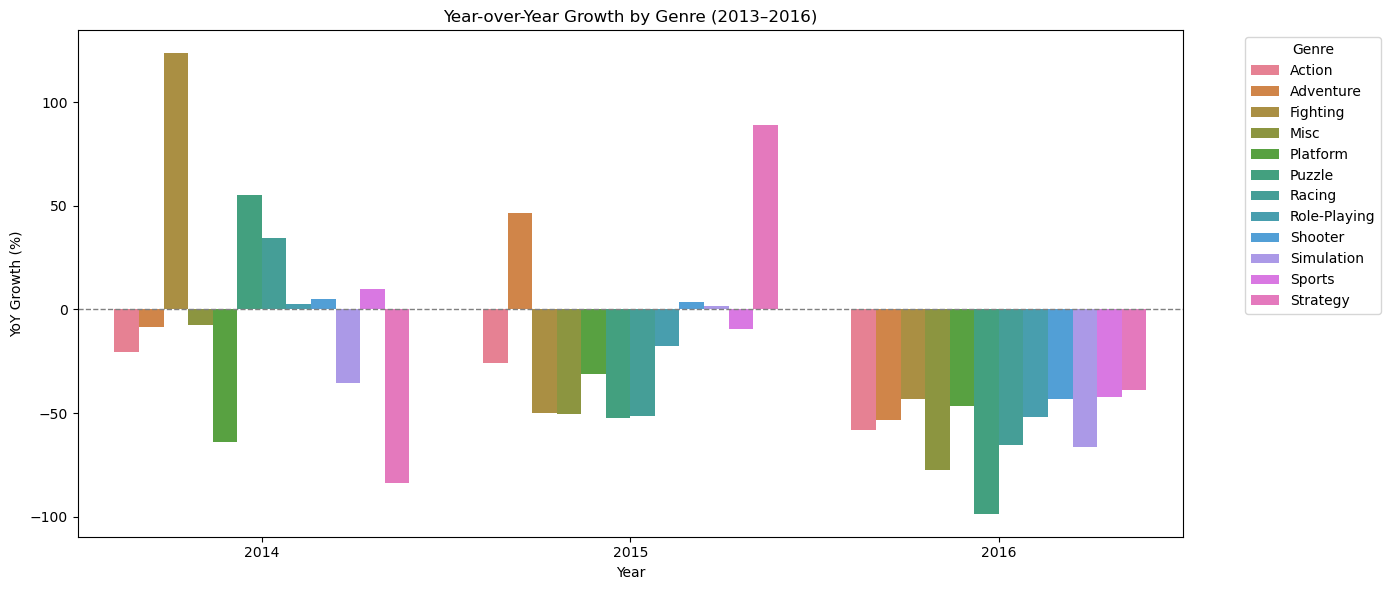

In [129]:


# Analyze genre performance over time
genre_sales_by_year = df_relevant.groupby(['genre', 'year_of_release'])['total_sales'].sum().reset_index()

# Calculate year-over-year growth for each genre
genre_sales_by_year['yoy_growth'] = genre_sales_by_year.groupby('genre')['total_sales'].pct_change() * 100

# Drop rows with NaN growth values (i.e., first year of each genre)
genre_growth_df = genre_sales_by_year.dropna(subset=['yoy_growth'])

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=genre_growth_df, x='year_of_release', y='yoy_growth', hue='genre')

plt.title('Year-over-Year Growth by Genre (2013–2016)')
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h3>🎯 <strong>YoY Growth by Genre (2013–2016)</strong></h3>

<div style="border: 2px solid #66b3ff; border-radius: 12px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

<p>➡️ This chart shows the <strong>year-over-year growth</strong> in global sales by video game genre, offering insights into market volatility and shifting player preferences from 2013 to 2016.</p>

<ul>
  <li>🎮 <strong>Fighting</strong>, <strong>Puzzle</strong>, and <strong>Racing</strong> genres experienced strong spikes in 2014, possibly due to standout titles or revivals.</li>
  <li>📉 A consistent decline is visible across <strong>most genres by 2016</strong>, reflecting a general slowdown or platform transition effects.</li>
  <li>🧠 <strong>Strategy</strong> games show sharp growth in 2015 but then a steep drop, signaling possible dependency on few hit titles.</li>
  <li>🚘 <strong>Racing</strong> and <strong>Sports</strong> genres show some of the steepest drops in 2015–2016.</li>
  <li>🔫 <strong>Shooter</strong> and <strong>Role-Playing</strong> genres displayed relative stability with minor fluctuations, indicating more consistent demand.</li>
</ul>

<p>📌 These trends highlight the genre-level dynamics at play and help identify which categories were gaining or losing traction as the market evolved.</p>

</div>


In [130]:
# Sort genres by total sales
sales_by_genre= df_relevant.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)


Text(0, 0.5, 'Total Sales (millions)')

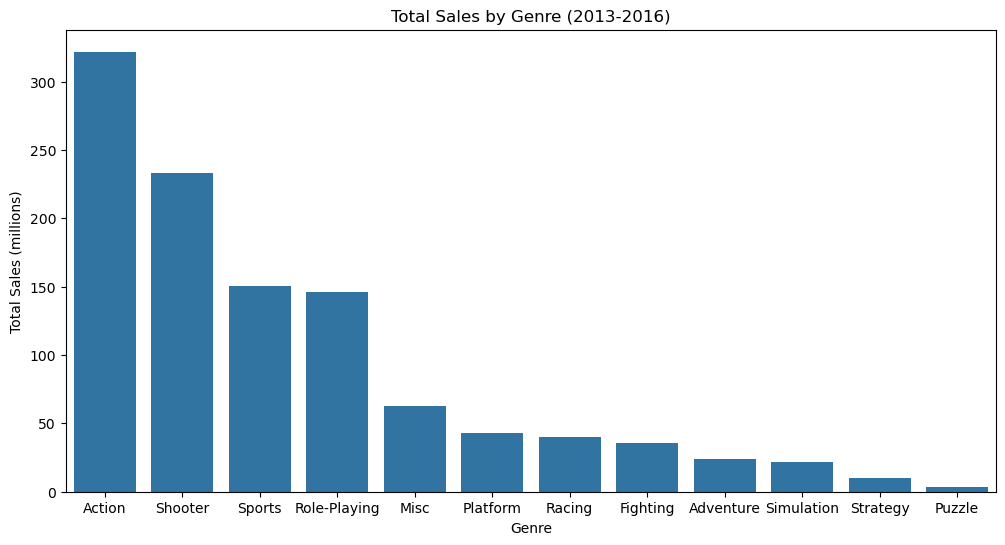

In [131]:
# Visualize genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='total_sales', data=sales_by_genre)
plt.title('Total Sales by Genre (2013-2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ <strong>Total Sales by Genre (2013–2016)</strong>

This plot highlights the total global sales across all genres during the analysis period.
<br>
<strong>Action</strong> and <strong>Shooter</strong> games clearly lead in total sales, reflecting strong consumer preference and commercial dominance.  
The results provide a foundational view of how revenue is distributed across game categories in the market.
</div>

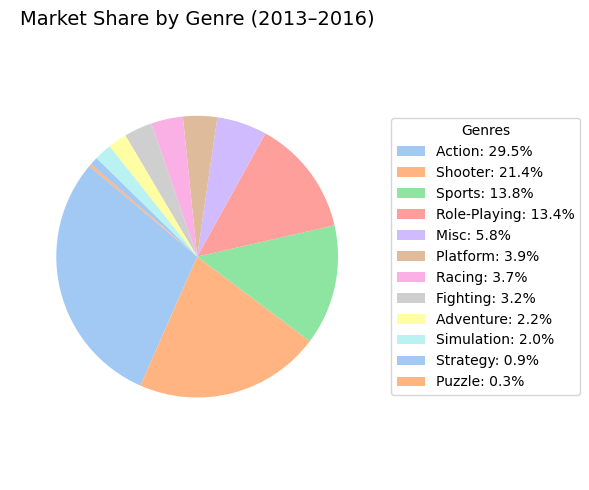

In [132]:

# Calculate market share (NOTE: use *100 for percentage, not *10)
sales_by_genre['market_share'] = (sales_by_genre['total_sales'] / sales_by_genre['total_sales'].sum()) * 100

# Set color palette
colors = sns.color_palette('pastel')[:len(sales_by_genre)]

# Create figure
plt.figure(figsize=(6, 5))

# Pie chart without labels (handled via legend)
patches, _ = plt.pie(
    sales_by_genre['market_share'],
    startangle=140,
    colors=colors,
    radius=1
)

# Title and layout
plt.title('Market Share by Genre (2013–2016)', fontsize=14)
plt.axis('equal')  # Ensures circle shape

# Create custom legend with genre names and market share
legend_labels = [
    f"{genre}: {share:.1f}%" 
    for genre, share in zip(sales_by_genre['genre'], sales_by_genre['market_share'])
]
plt.legend(patches, legend_labels, title="Genres", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

plt.tight_layout()
plt.show()

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ <strong>Total Sales and Market Share by Genre (2013–2016)</strong>  
This comparison highlights the sales volume and market distribution across game genres.

<br>

- <strong>Action</strong> and <strong>Shooter</strong> dominate the market, jointly accounting for over <strong>50%</strong> of total sales.  
- <strong>Sports</strong> and <strong>Role-Playing</strong> also perform strongly, holding more than <strong>25%</strong> of the share.  
- <strong>Misc, Platform, and Racing</strong> occupy a mid-range position in both sales and market presence.  
- <strong>Fighting, Adventure, Simulation, Strategy, and Puzzle</strong> show significantly lower sales, reflecting niche appeal or fewer high-performing titles.

</div>

In [133]:

# Calculate average and variance of total sales for each genre
genre_sales_stats = df_relevant.groupby('genre')['total_sales'].agg(['mean', 'var','sum']).reset_index()

display(genre_sales_stats.sort_values(by='sum', ascending=False))

,genre,mean,var,sum
0,Action,0.420196,1.572289,321.87
8,Shooter,1.245882,4.056627,232.98
10,Sports,0.703972,1.486540,150.65
7,Role-Playing,0.499623,1.831052,145.89
3,Misc,0.405290,1.016033,62.82
4,Platform,0.576081,0.650939,42.63
6,Racing,0.469294,0.929490,39.89
2,Fighting,0.441375,1.100156,35.31
1,Adventure,0.096490,0.046848,23.64
9,Simulation,0.350968,0.721078,21.76


<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ <strong>Average and Variance of Total Sales per Game by Genre (2013–2016)</strong>  
This analysis highlights differences in performance across genres using total sales, average per game, and variance.

<br>

- 🎮 <strong>Action</strong> is the top-selling genre with <strong>321.87M</strong> in total sales. However, its <strong>low average per game (0.42M)</strong> and <strong>moderate variance (1.57)</strong> suggest broad, consistent performance across a large number of titles.  
- 🔫 <strong>Shooter</strong> ranks second with <strong>232.98M</strong> in total sales but shows a <strong>high average (1.25M)</strong> and the <strong>highest variance (4.06)</strong>. This points to a hit-driven pattern, where a few blockbuster games dominate sales while others underperform.

</div>

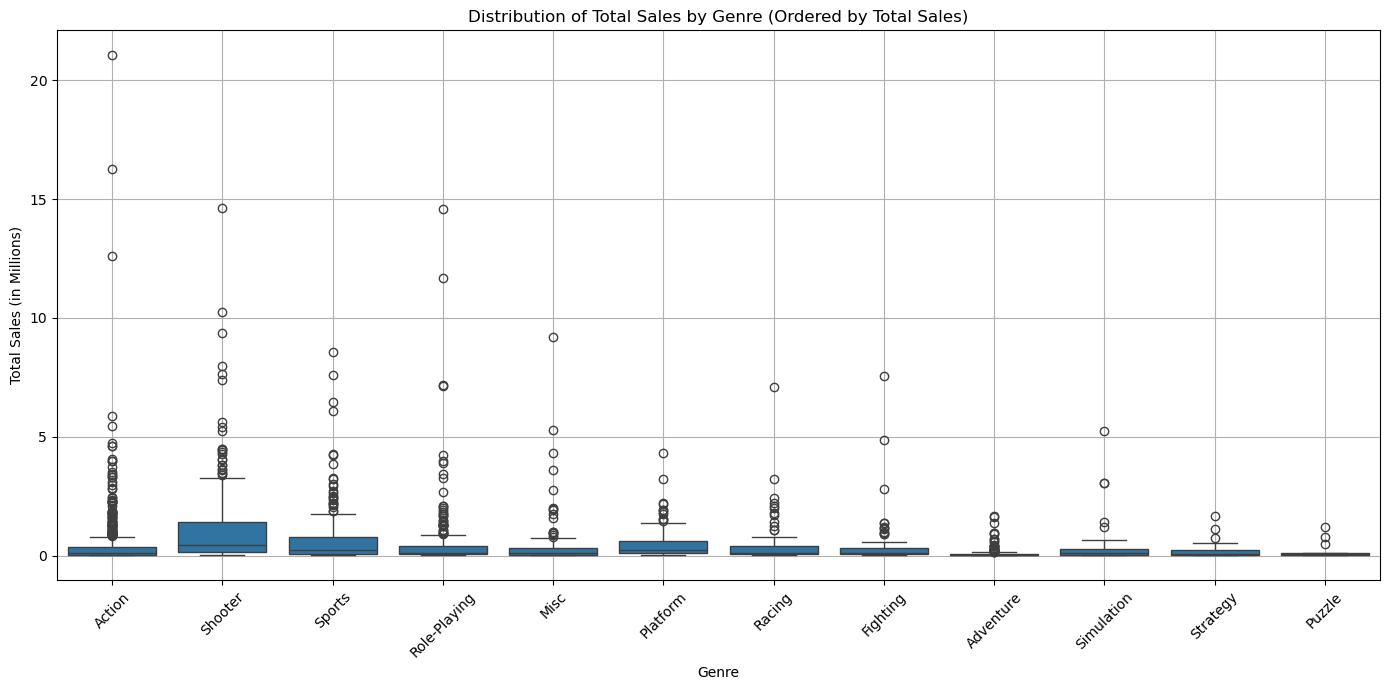

In [134]:

## Get genre order based on total sales 
genre_order = sales_by_genre['genre']

# Create the boxplot using that custom order
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df_relevant,
    x='genre',
    y='total_sales',
    order=genre_order,
    showfliers=True  # Set to False if you want to hide outliers
)
plt.title('Distribution of Total Sales by Genre (Ordered by Total Sales)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in Millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 12px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
➡️ <strong>Insights from the Box Plot: Sales Distribution by Genre</strong> 

The box plot (ordered by total sales) visually reinforces the structural differences between genres.
<br>
- <strong>Action</strong> shows a tight distribution with many low-to-mid sales titles and few outliers, confirming a volume-based success model.  
- <strong>Shooter</strong> displays a wider spread with many high outliers, suggesting a hit-driven model — a few standout titles generate most of the sales (e.g., <em>Call of Duty</em>).  
- <strong>Puzzle, Strategy, and Simulation</strong> exhibit low totals, low variance, and tight distributions, indicating smaller but consistent niche markets.

</div>

In [135]:
# Filter for Shooter genre in the relevant time period
shooter_games = df_relevant[df_relevant['genre'].isin(['Shooter'])]

# Calculate total sales for the Shooter genre
total_shooter_sales = shooter_games['total_sales'].sum()

# Sort Shooter games by total sales and get top 10
top_shooter_games = shooter_games.sort_values(by='total_sales', ascending=False).head(10)

# Calculate share of each game within the Shooter genre
top_shooter_games['share (%)'] = (top_shooter_games['total_sales'] / total_shooter_sales) * 100

# Select relevant columns to display
top_shooter_games_display = top_shooter_games[['name', 'total_sales', 'share (%)']].copy()

# Optional: round for better readability
top_shooter_games_display['total_sales'] = top_shooter_games_display['total_sales'].round(2)
top_shooter_games_display['share (%)'] = top_shooter_games_display['share (%)'].round(2)

display(top_shooter_games_display)

,name,total_sales,share (%)
31,Call of Duty: Black Ops 3,14.63,6.28
60,Call of Duty: Ghosts,10.24,4.40
69,Call of Duty: Ghosts,9.36,4.02
87,Star Wars Battlefront (2015),7.98,3.43
92,Call of Duty: Advanced Warfare,7.66,3.29
99,Call of Duty: Black Ops 3,7.39,3.17
154,Destiny,5.64,2.42
171,Uncharted 4: A Thief's End,5.39,2.31
179,Call of Duty: Advanced Warfare,5.26,2.26
241,Halo 5: Guardians,4.49,1.93



<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

### 🔍 **Top-Selling Shooter Games (2013–2016)**

The Shooter genre is characterized by high variance and a hit-driven model, and this table of the top 10 titles by total sales illustrates that pattern clearly:

- 🎖️ <strong>Call of Duty</strong> dominates the chart with multiple entries across different editions — <em>Black Ops 3</em>, <em>Ghosts</em>, and <em>Advanced Warfare</em> — collectively accounting for over <strong>half</strong> of the top 10 sales in this genre.
- 🚀 <em>Star Wars Battlefront (2015)</em> and <em>Destiny</em> also stand out with strong figures, showing that <strong>blockbuster franchises with strong branding</strong> can compete in this space.
- 🔁 Some games like <em>Call of Duty: Ghosts</em> and <em>Black Ops 3</em> appear <strong>more than once</strong>, suggesting either versioning across platforms or inconsistencies in title reporting.
- 🕹️ <em>Halo 5: Guardians</em> rounds out the list with a respectable <strong>1.93%</strong> of total shooter sales, reflecting its role as a console-exclusive stronghold.
- 🧠 Surprisingly, <em>Uncharted 4: A Thief's End</em>, generally categorized as <strong>Action-Adventure</strong>, appears here under Shooter — highlighting genre classification overlap.

📌 These top titles reflect the concentrated nature of success in the Shooter category: a few blockbuster releases dominate total sales, while the rest of the market contributes modestly.

</div>

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

### 🔍 **Genre Sales Performance Summary (2013–2016)**

The genre analysis highlights how market performance varies significantly depending on the type of game:

- 🎮 **Action** leads in total sales with a high volume of releases and moderate average sales — a strategy built on consistent performance across many titles.
- 🔫 **Shooter** follows closely but adopts a hit-driven model: a small number of blockbuster games (e.g., *Call of Duty*) account for a disproportionate share of total revenue.
- 🏅 **Sports** and 🧙‍♂️ **Role-Playing** genres also show strong results, combining solid averages with a good number of releases — especially from franchises like *FIFA* and *Pokémon*.
- 🛣️ Genres like **Racing**, **Platform**, and **Miscellaneous** occupy a middle tier, with moderate contribution to overall market share.
- 🧩 **Puzzle**, 🗺️ **Strategy**, and 🔬 **Simulation** remain niche genres, marked by lower total sales, tighter distribution, and low variance.

📉 By 2016, most genres showed declining year-over-year growth, reinforcing signs of market saturation or shifting consumer interest.

📊 Together, **Action and Shooter genres accounted for over 50% of total market share**, confirming their central role in commercial success during this period.

</div>

## 📊 Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">
    
➡️ This regional analysis aims to uncover differences in gaming preferences and market behavior across North America, Europe, and Japan, helping to inform region-specific strategies for game development, marketing, and distribution.

</div>

### 🌍 4.1 Regional Platform Analysis

In [136]:

# Function to analyze platform performance by region
def analyze_platform_performance_by_region(dataframe, region_sales_column):
    """
    Analyzes platform performance for a specific region.

    Args:
        dataframe: The input pandas DataFrame.
        region_sales_column: The name of the column containing sales data for the region (e.g., 'na_sales').

    Returns:
        A DataFrame with platform and total sales for the specified region, sorted by total sales.
    """
    platform_sales = dataframe.groupby('platform')[region_sales_column].sum().reset_index()
    platform_sales = platform_sales.sort_values(by=region_sales_column, ascending=False)
    return platform_sales

In [137]:

# Analyze North America
na_platform_sales = analyze_platform_performance_by_region(df_relevant, 'na_sales')

In [138]:
# Analyze Japan
jp_platform_sales = analyze_platform_performance_by_region(df_relevant, 'jp_sales')


In [139]:
# Analyze Europe
eu_platform_sales = analyze_platform_performance_by_region(df_relevant, 'eu_sales')


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [140]:
# Create a comparative platform analysis
# Combine regional platform sales dataframes
combined_platform_sales = na_platform_sales.rename(columns={'na_sales': 'sales'}).copy()
combined_platform_sales['region'] = 'NA'

eu_sales_temp = eu_platform_sales.rename(columns={'eu_sales': 'sales'}).copy()
eu_sales_temp['region'] = 'EU'

jp_sales_temp = jp_platform_sales.rename(columns={'jp_sales': 'sales'}).copy()
jp_sales_temp['region'] = 'JP'

comparative_platform_sales = pd.concat([combined_platform_sales, eu_sales_temp, jp_sales_temp])

# Display the combined dataframe
comparative_platform_sales

,platform,sales,region
4,PS4,108.74,NA
10,XOne,93.12,NA
9,X360,81.66,NA
3,PS3,63.50,NA
0,3DS,38.20,NA
8,WiiU,29.21,NA
2,PC,11.11,NA
7,Wii,6.56,NA
6,PSV,5.04,NA
1,DS,0.57,NA


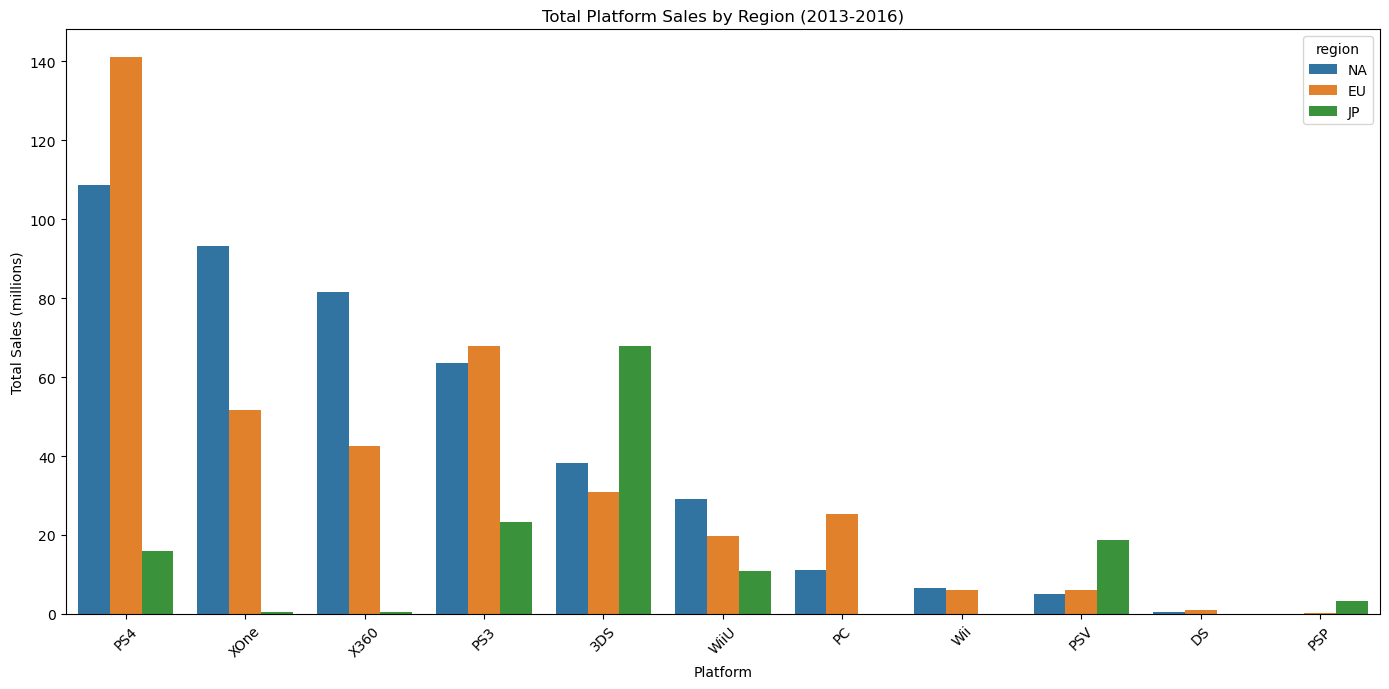

In [141]:
# Visualize cross-regional comparison for platforms
plt.figure(figsize=(14, 7))
sns.barplot(x='platform', y='sales', hue='region', data=comparative_platform_sales)
plt.title('Total Platform Sales by Region (2013-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 12px;">

🔍 **Regional Platform Sales (2013–2016)**

The bar chart above illustrates the total sales for each platform across North America (NA), Europe (EU), and Japan (JP) during the 2013–2016 period.

**Key observations:**

- **Regional Differences in Platform Popularity:**
  - In **North America and Europe**, **PlayStation 4 (PS4)** and **Xbox One (XOne)** dominate, followed by PS3 and X360. **PC** also shows a solid presence.
  - In **Japan**, the **Nintendo 3DS (3DS)** leads by a wide margin, ahead of PS3 and PSV. **PS4** and **WiiU** lag behind, and **Xbox** platforms are nearly absent.
  
- **Cross-Region Consistency:**
  - PS4 and XOne maintain strong performance across both **NA** and **EU**.

- **Japan's Unique Market:**
  - Japan shows a clear preference for **Nintendo** handhelds, reinforcing its distinct consumer behavior.

This cross-regional platform analysis is crucial for understanding the different market landscapes and tailoring strategies for specific regions.

</div>

### 🌏 4.2 Regional Genre Analysis

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 14px;">

➡️ Now let's examine the distribution of game genres across North America, Europe, and Japan.  
This analysis will reveal regional preferences in game types and help identify which genres dominate in each market between 2013 and 2016.

</div>

In [142]:
# Function to analyze genre performance by region
def analyze_genre_performance_by_region(dataframe, region_sales_column):
    genre_sales = dataframe.groupby('genre')[region_sales_column].sum().reset_index()
    genre_sales = genre_sales.sort_values(by=region_sales_column, ascending=False)
    return genre_sales

In [143]:

# Analyze North America
na_genre_sales = analyze_genre_performance_by_region(df_relevant, 'na_sales')



In [144]:
# Analyze Japan
jp_genre_sales = analyze_genre_performance_by_region(df_relevant, 'jp_sales')


In [145]:
# Analyze Europe
eu_genre_sales = analyze_genre_performance_by_region(df_relevant, 'eu_sales')


### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [146]:

# Create a comparative genre analysis

combined_genre_sales = na_genre_sales.rename(columns={'na_sales': 'sales'}).copy()
combined_genre_sales['region'] = 'NA'

eu_sales_temp2 = eu_genre_sales.rename(columns={'eu_sales': 'sales'}).copy()
eu_sales_temp2['region'] = 'EU'

jp_sales_temp2 = jp_genre_sales.rename(columns={'jp_sales': 'sales'}).copy()
jp_sales_temp2['region'] = 'JP'

comparative_genre_sales = pd.concat([combined_genre_sales, eu_sales_temp2, jp_sales_temp2])




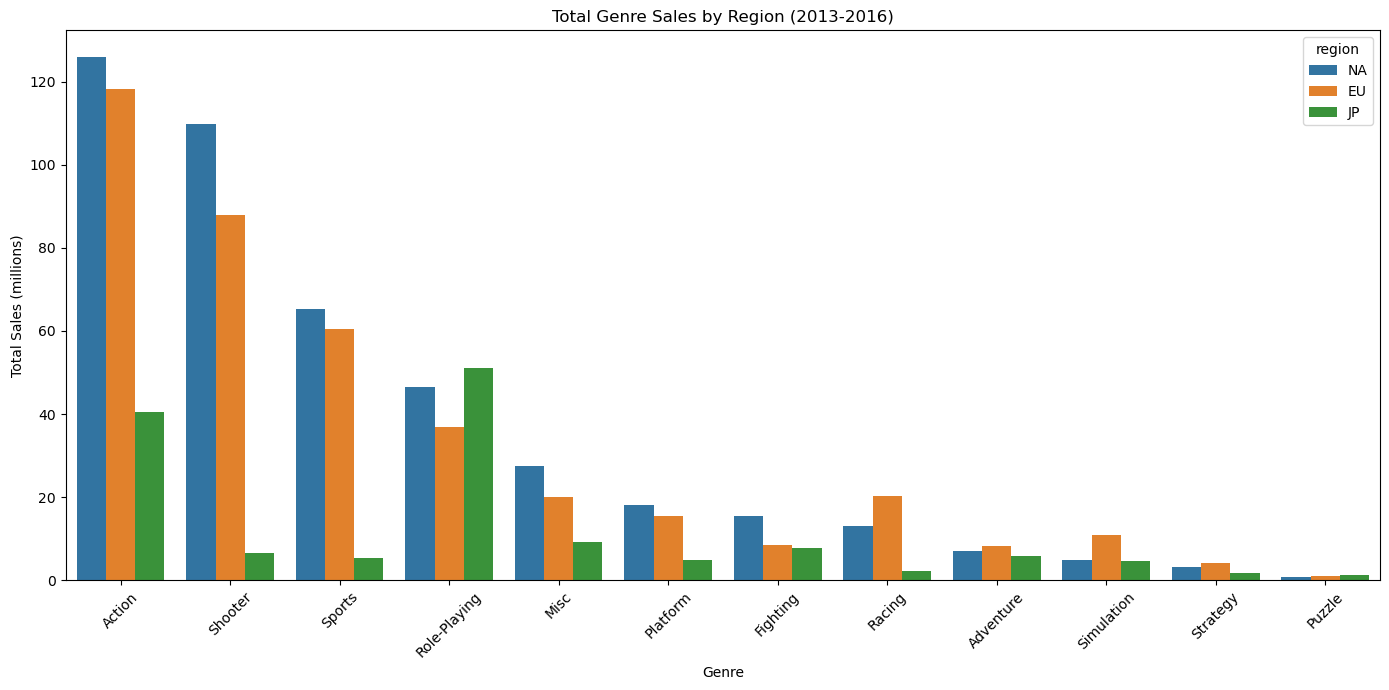

In [147]:

# Visualize cross-regional comparison for genres
plt.figure(figsize=(14, 7))
sns.barplot(x='genre', y='sales', hue='region', data=comparative_genre_sales)
plt.title('Total Genre Sales by Region (2013-2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 13px;">

🔍 **Total Genre Sales by Region (2013–2016)**

Key observations:

- **Action and Shooter Dominate in NA and EU**
- **Role-Playing's Strength in Japan:** In contrast to NA and EU, Role-Playing is the top-selling genre in Japan, followed by Action and Misc. This demonstrates a distinct regional preference for Role-Playing games in Japan.
- **Consistent Genres Across NA and EU:** Genres like Sports, Misc, and Racing show similar relative performance in North America and Europe.
- **Niche Genres Vary by Region:** The performance of niche genres like Adventure, Simulation, Strategy, and Puzzle varies across regions, reflecting different market sizes and player preferences.

This regional genre analysis provides valuable insights into tailoring game development and marketing strategies for specific geographic markets based on their unique genre preferences.

</div>


## 🎯 4.3 ESRB Rating Impact Analysis

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 13px;">

➡️ Finally, let's examine how ESRB ratings affect game sales in each region. This analysis will help us understand whether content ratings is related to market performance differently in North America, Europe, and Japan during the 2013–2016 period.

</div>

In [148]:

# Function to analyze ESRB rating impact
def analyze_esrb_impact_by_region(dataframe, region_sales_column):
    esrb_sales = dataframe.groupby('rating')[region_sales_column].sum().reset_index()
    esrb_sales = esrb_sales.sort_values(by=region_sales_column, ascending=False)
    return esrb_sales


In [149]:

# Analyze ESRB impact for North America
na_esrb_sales = analyze_esrb_impact_by_region(df_relevant, 'na_sales')
na_esrb_sales


,rating,na_sales
2,M,165.21
0,E,79.05
1,E10+,54.24
3,T,49.79


In [150]:
# Analyze ESRB impact for Europe
eu_esrb_sales = analyze_esrb_impact_by_region(df_relevant, 'eu_sales')
eu_esrb_sales

,rating,eu_sales
2,M,145.32
0,E,83.36
1,E10+,42.69
3,T,41.95


In [151]:
# Analyze ESRB impact for Japan
jp_esrb_sales = analyze_esrb_impact_by_region(df_relevant, 'jp_sales')
jp_esrb_sales

,rating,jp_sales
3,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


In [152]:

# Combine regional ESRB sales dataframes
combined_esrb_sales = na_esrb_sales.rename(columns={'na_sales': 'sales'}).copy()
combined_esrb_sales['region'] = 'NA'

eu_esrb_temp = eu_esrb_sales.rename(columns={'eu_sales': 'sales'}).copy()
eu_esrb_temp['region'] = 'EU'

jp_esrb_temp = jp_esrb_sales.rename(columns={'jp_sales': 'sales'}).copy()
jp_esrb_temp['region'] = 'JP'

comparative_esrb_sales = pd.concat([combined_esrb_sales, eu_esrb_temp, jp_esrb_temp])

# Define the desired order for ratings
rating_order = ['E', 'E10+', 'T', 'M'] # Including other possible ratings from previous analysis

# Convert the 'rating' column to a categorical type with the specified order
comparative_esrb_sales['rating'] = pd.Categorical(comparative_esrb_sales['rating'], categories=rating_order, ordered=True)


comparative_esrb_sales

,rating,sales,region
2,M,165.21,NA
0,E,79.05,NA
1,E10+,54.24,NA
3,T,49.79,NA
2,M,145.32,EU
0,E,83.36,EU
1,E10+,42.69,EU
3,T,41.95,EU
3,T,20.59,JP
0,E,15.14,JP


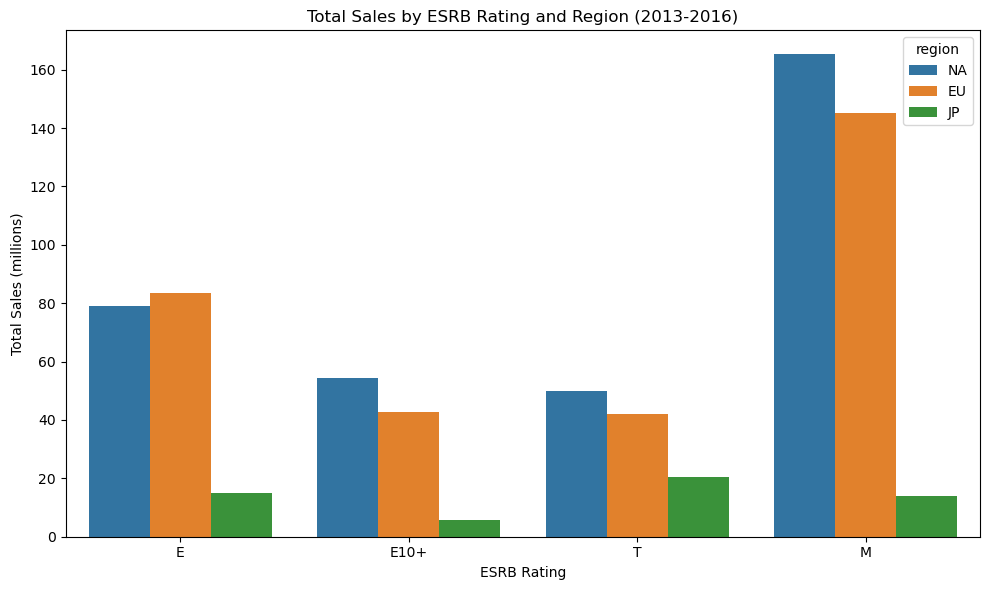

In [153]:

# Visualize cross-regional comparison for ESRB ratings
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='sales', hue='region', data=comparative_esrb_sales)
plt.title('Total Sales by ESRB Rating and Region (2013-2016)')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (millions)')
plt.tight_layout()
plt.show()

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 13px;">

🔍 **Total Sales by ESRB Rating and Region (2013–2016)**

Key observations:

- **Mature (M) Rating Dominance in NA and EU.**
- **Teen (T) and Everyone (E) Performing Well in NA and EU.**
- **Different Landscape in Japan:** The distribution of sales by rating is different in Japan. Teen (T) rated games have the highest sales, followed by Everyone (E) and then Mature (M). This suggests different cultural preferences and market dynamics in Japan regarding game content and ratings.
- **E10+ Sales:** Games rated Everyone 10+ (E10+) have moderate sales in NA and EU but significantly lower sales in Japan.

This cross-regional analysis of ESRB ratings highlights that the impact of ratings on sales varies considerably by region, with M-rated games being the strongest performers in Western markets and T-rated games leading in Japan.

</div>

## 🧪 Step 5: Hypothesis Tests

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 13px;">

➡️ In this step, we will test two hypotheses related to **user ratings** to determine whether observed differences are statistically significant or likely due to random chance.



<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 13px;">

➡️ **Hypothesis Test: Average User Ratings for Xbox One and PC**

We want to determine if there's a statistically significant difference between user ratings for games released on **Xbox One** and **PC**.

- **Null Hypothesis (H₀):** The average user rating for Xbox One is equal to the average user rating for PC.  
  *μ₁ = μ₂*

- **Alternative Hypothesis (H₁):** The average user rating for Xbox One is **not equal** to the average user rating for PC.  
  *μ₁ ≠ μ₂*

📌 A **two-tailed t-test** is appropriate here because we are testing for a difference in either direction — whether Xbox One ratings are higher or lower than PC ratings.

</div>

In [154]:
from scipy import stats

# Filter user scores for Xbox One and PC within the relevant time period, dropping missing values
xbox_one_user_scores = df_relevant[(df_relevant['platform'] == 'XOne') & (df_relevant['user_score'].notna())]['user_score']
pc_user_scores = df_relevant[(df_relevant['platform'] == 'PC') & (df_relevant['user_score'].notna())]['user_score']

# Set the alpha threshold
alpha = 0.05

# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(xbox_one_user_scores, pc_user_scores, equal_var=False) # Using Welch's t-test (equal_var=False) as sample sizes/variances may differ

# Print the results
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Compare p-value to alpha and state the conclusion
if p_value < alpha:
    print(f"\nWith a p-value of {p_value:.4f}, which is less than the alpha of {alpha}, we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference between the average user ratings of Xbox One and PC platforms.")
else:
    print(f"\nWith a p-value of {p_value:.4f}, which is greater than or equal to the alpha of {alpha}, we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference between the average user ratings of Xbox One and PC platforms based on this data.")

T-statistic: 1.4519
P-value: 0.1476

With a p-value of 0.1476, which is greater than or equal to the alpha of 0.05, we fail to reject the null hypothesis.
Conclusion: There is no statistically significant difference between the average user ratings of Xbox One and PC platforms based on this data.



<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 13px;">

🔍 **Conclusion: Xbox One vs. PC User Ratings**

Since the **p-value is greater than α = 0.05**, we **fail to reject the null hypothesis**.

This means that, based on the user rating data for games released between 2013 and 2016, **there is no statistically significant difference** in the average user ratings between the **Xbox One** and **PC** platforms. The observed differences could likely be due to random variation.

</div>

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 13px;">

➡️ **Hypothesis Test: Average User Ratings for Action and Sports Genres**

We want to assess whether the **average user ratings** differ between the **Action** and **Sports** game genres.

- **Null Hypothesis (H₀):** The average user rating for Action games is equal to the average user rating for Sports games.  
  *μ₁ = μ₂*

- **Alternative Hypothesis (H₁):** The average user rating for Action games is **not equal** to that of Sports games.  
  *μ₁ ≠ μ₂*

📌 A **two-tailed t-test** is used since we are testing for a difference in either direction — whether Action games are rated higher or lower than Sports games on average.

</div>

In [155]:

from scipy import stats

# Filter user scores for Action and Sports genres within the relevant time period, dropping missing values
action_user_scores = df_relevant[(df_relevant['genre'] == 'Action') & (df_relevant['user_score'].notna())]['user_score']
sports_user_scores = df_relevant[(df_relevant['genre'] == 'Sports') & (df_relevant['user_score'].notna())]['user_score']

# Set the alpha threshold (using the same alpha as the previous test)
alpha = 0.05

# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(action_user_scores, sports_user_scores, equal_var=False) # Using Welch's t-test (equal_var=False)

# Print the results
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Compare p-value to alpha and state the conclusion
if p_value < alpha:
    print(f"\nWith a p-value of {p_value:.4f}, which is less than the alpha of {alpha}, we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference between the average user ratings for Action and Sports genres.")
else:
    print(f"\nWith a p-value of {p_value:.4f}, which is greater than or equal to the alpha of {alpha}, we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference between the average user ratings for Action and Sports genres based on this data.")


T-statistic: 10.2334
P-value: 0.0000

With a p-value of 0.0000, which is less than the alpha of 0.05, we reject the null hypothesis.
Conclusion: There is a statistically significant difference between the average user ratings for Action and Sports genres.


<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 13px;">

🔍 **Conclusion: Action vs. Sports User Ratings**

Since the **p-value is less than α = 0.05**, we **reject the null hypothesis**.

This indicates that, based on the 2013–2016 data, there is a **statistically significant difference** in average user ratings between games in the **Action** and **Sports** genres. The difference observed is unlikely to be due to random chance alone, suggesting that user perception varies meaningfully between these two genres.

</div>

<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 13px;">

🔍 **Summary: Hypothesis Testing Results**

In this section, we tested two hypotheses to explore differences in **user ratings across platforms and genres**:

1. **Xbox One vs. PC:**  
   - ✅ Result: **No significant difference** in average user ratings.  
   - 📌 Interpretation: Players rated games similarly on both platforms during 2013–2016.

2. **Action vs. Sports Genres:**  
   - ✅ Result: **Statistically significant difference** in average user ratings.  
   - 📌 Interpretation: Players rated Action and Sports games differently, reflecting divergent user expectations or experiences by genre.

These results illustrate how **user ratings vary by content type more than by platform**, offering useful insight for game development, platform marketing, and portfolio decisions.

</div>

# Step 6. Write a General Conclusion


<div style="border: 2px solid #66b3ff; border-radius: 10px; padding: 15px; background-color: #f0f8ff; font-family: sans-serif; font-size: 13px;">

🔍 **Final Conclusion: Understanding Success Factors in the Video Game Market**

Throughout this project, we analyzed historical video game sales data to identify the key patterns that influence commercial success. By stepping into the role of data analysts at **Ice**, our goal was to simulate a real-world scenario in December 2016 and help plan informed advertising strategies for the upcoming year.

📌 **Key Takeaways:**

- **Platform trends** revealed that **PS4, PC, and XOne** were the most promising systems in 2016, while others like **PS3, Wii, and 3DS** were clearly declining.
- **Genre performance** showed that **Action** and **Shooter** games dominated the market, but their success followed different patterns: Action relied on volume, while Shooter was driven by a few blockbusters.
- **Review scores**—especially from critics—had a moderate correlation with sales, while **user scores** showed weaker or negligible correlations.
- **Regional preferences** highlighted important distinctions, such as the strength of Role-Playing games and Nintendo platforms in **Japan**, versus Shooter and Sports dominance in **North America** and **Europe**.
- **Hypothesis testing** confirmed that platform alone didn’t strongly influence user ratings (Xbox One vs. PC), but **genre** did (Action vs. Sports), suggesting content matters more than console choice in shaping user satisfaction.

🧠 **Strategic Implication:**
To forecast future sales and launch effective campaigns, it’s essential to target:
- **growing platforms**,
- **popular but consistently performing genres** and
- **regional user preferences and cultural nuances**.

High critic ratings can be used as early indicators of potential hits, and successful multi-platform titles often find their strongest returns on newer-generation consoles.

### 🔮 Further Analysis: Leveraging Top-Selling Platforms

As a potential improvement, we recommend conducting a deeper analysis on the **top six best-selling platforms** in the dataset:  
<strong>PS2, X360, PS3, Wii, DS,</strong> and <strong>PS</strong>. These platforms represent the most commercially successful systems of their time, offering high data volume and long operational lifespans.

<br>

📌 **Why focus on them?**
- They capture a wide variety of user behavior across regions and years.
- Their high sales volume makes them statistically relevant and robust to noise.
- They may contain **timeless insights** not influenced by short-term generational shifts.

<br>

📈 By isolating their full market trajectory — including launch dynamics, genre distribution, regional success, and sales curves — we can derive long-term behavioral trends. These can be used to build stronger predictive features and more resilient forecasting models for future or hypothetical platforms.

</div>